In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score,StratifiedKFold,KFold
from sklearn.feature_selection import SelectKBest,f_classif,SelectFdr
from sklearn import svm
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize,RobustScaler,StandardScaler
from sklearn.cluster import KMeans
from lifelines import CoxPHFitter
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import backend
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotUniform,RandomUniform,Constant
from scipy.stats import spearmanr

GDSC

In [2]:
# load genes from GDSC dataset
genes = pd.read_csv("genes_GDSC_oxa.csv")
genes

Unnamed: 0 Unnamed: 0.1
0               0       TSPAN6
1               1         DPM1
2               2        SCYL3
3               3          FGR
4               4          CFH
...           ...          ...
10227       10227    LINC00657
10228       10228          MIA
10229       10229    LINC00514
10230       10230    LINC00526
10231       10231       UBL5P2

[10232 rows x 2 columns]

IMPRESS

In [3]:
# GSE dataset
impress = pd.read_csv("cellNorm22cpm_input.csv")
impress = impress.set_index(['Unnamed: 0'])
impress

TSPAN6      TNMD      DPM1     SCYL3  C1orf112  FGR       CFH  \
Unnamed: 0                                                                    
GS.802      6.142303 -1.761883  6.238693  4.615545  5.067942    0 -3.160422   
GS.295      6.081011 -3.160422  6.178049  4.665697  4.582609    0  1.039597   
GS.598      5.973943 -3.160422  5.411198  4.489564  4.494100    0  3.840939   
GS.359      5.697562 -3.160422  5.937262  4.208244  3.829931    0 -3.160422   
GS.786      5.534586 -2.717335  5.860319  4.445250  4.972458    0  2.181070   
GS.799      6.832313 -1.506272  6.099326  4.401022  4.952996    0  6.942056   
GS.502      5.517285 -1.941725  5.348823  4.242534  4.558786    0  4.096808   
GS.828      5.712526 -2.597850  5.365842  4.375322  4.352902    0  3.173043   
GS.507      5.523846 -3.160422  5.573481  4.601000  4.862926    0 -0.124912   
GS.365      5.531540 -3.160422  5.870474  3.989988  4.648827    0  2.396516   
GS.353      5.275077 -3.160422  5.804833  3.835568  5.180088    0  1.314898   
GS.820      5.368194 -3.160422  5.971555  4.601827  4.870485    0  4.863753   
GS.691      5.607398 -3.160422  6.485675  4.246032  4.986126    0  0.246177   
GS.607      5.626006 -3.160422  6.453412  4.011288  5.063198    0  1.432262   
GS.824      4.969876 -3.160422  5.970765  4.573750  4.578301    0  2.467156   
GS.741      6.136360 -1.660152  6.419844  4.221773  4.129240    0 -3.160422   
GS.636      5.729064 -3.160422  6.046924  3.628057  4.567995    0  3.574782   
GS.772      5.321963 -3.160422  5.487617  4.081945  4.759824    0 -0.061452   
GS.832      6.206561 -3.160422  6.005395  4.468154  5.007905    0  1.084287   
GS.944      0.062530 -3.160422  6.186718  4.156105  4.904496    0  0.062530   
GS.851      5.911895 -3.160422  5.728812  3.854323  4.100488    0 -3.160422   
GS.627      4.930072 -3.160422  6.501398  3.919374  5.032678    0 -0.280255   

               FUCA2      GCLC      NFYA  ...  LINC00514  OR1D5    ZNF234  \
Unnamed: 0                                ...                               
GS.802      4.850279  4.468255  5.393102  ...  -3.160422      0  4.604734   
GS.295      5.234283  4.294598  5.008302  ...  -2.421923      0  3.264026   
GS.598      5.467636  4.686699  5.826187  ...  -3.160422      0  4.646519   
GS.359      6.117203  4.836042  5.841040  ...  -3.160422      0  4.232245   
GS.786      6.685488  4.396504  5.720995  ...  -3.160422      0  3.648075   
GS.799      6.012090  5.007873  5.762113  ...  -3.160422      0  4.106370   
GS.502      5.770738  3.496134  5.773677  ...  -1.941725      0  4.769770   
GS.828      4.802271  4.142446  5.111402  ...  -2.597850      0  4.326297   
GS.507      5.597672  3.868460  4.977976  ...  -0.124912      0  4.019358   
GS.365      5.414395  4.216067  5.269203  ...  -2.722730      0  4.448613   
GS.353      5.804833  4.429051  5.601273  ...  -3.160422      0  3.705179   
GS.820      4.850195  5.251853  5.614628  ...  -3.160422      0  4.069770   
GS.691      6.163851  4.997814  5.391054  ...  -1.614013      0  3.327340   
GS.607      5.496186  4.521199  5.098640  ...  -3.160422      0  3.477257   
GS.824      5.237817  4.224773  4.884249  ...  -3.160422      0  3.886036   
GS.741      5.973696  4.140439  5.031445  ...  -3.160422      0  4.054245   
GS.636      5.597239  4.149161  5.099736  ...  -3.160422      0  3.500542   
GS.772      5.938310  4.595913  5.544324  ...  -3.160422      0  4.003220   
GS.832      6.029359  4.880197  5.049122  ...  -3.160422      0  3.569954   
GS.944      5.517336  4.712620  5.426417  ...  -3.160422      0  0.062530   
GS.851      5.490573  4.374485  5.370590  ...  -3.160422      0  4.174018   
GS.627      6.127707  4.501970  5.143833  ...  -0.740023      0  3.125312   

            MYH4  LINC00526  PPY2  KRT18P55  POLRMTP1    UBL5P2  TBC1D3P5  
Unnamed: 0                                                                 
GS.802         0   2.893857     0 -2.532397 -0.244829 -2.532397         0  
GS.295         0   3.206767     0 -3.160

In [4]:
# consistent features 
impress = impress.reindex(columns = genes["Unnamed: 0.1"])
impress

Unnamed: 0.1    TSPAN6      DPM1     SCYL3  FGR       CFH     FUCA2      GCLC  \
Unnamed: 0                                                                      
GS.802        6.142303  6.238693  4.615545    0 -3.160422  4.850279  4.468255   
GS.295        6.081011  6.178049  4.665697    0  1.039597  5.234283  4.294598   
GS.598        5.973943  5.411198  4.489564    0  3.840939  5.467636  4.686699   
GS.359        5.697562  5.937262  4.208244    0 -3.160422  6.117203  4.836042   
GS.786        5.534586  5.860319  4.445250    0  2.181070  6.685488  4.396504   
GS.799        6.832313  6.099326  4.401022    0  6.942056  6.012090  5.007873   
GS.502        5.517285  5.348823  4.242534    0  4.096808  5.770738  3.496134   
GS.828        5.712526  5.365842  4.375322    0  3.173043  4.802271  4.142446   
GS.507        5.523846  5.573481  4.601000    0 -0.124912  5.597672  3.868460   
GS.365        5.531540  5.870474  3.989988    0  2.396516  5.414395  4.216067   
GS.353        5.275077  5.804833  3.835568    0  1.314898  5.804833  4.429051   
GS.820        5.368194  5.971555  4.601827    0  4.863753  4.850195  5.251853   
GS.691        5.607398  6.485675  4.246032    0  0.246177  6.163851  4.997814   
GS.607        5.626006  6.453412  4.011288    0  1.432262  5.496186  4.521199   
GS.824        4.969876  5.970765  4.573750    0  2.467156  5.237817  4.224773   
GS.741        6.136360  6.419844  4.221773    0 -3.160422  5.973696  4.140439   
GS.636        5.729064  6.046924  3.628057    0  3.574782  5.597239  4.149161   
GS.772        5.321963  5.487617  4.081945    0 -0.061452  5.938310  4.595913   
GS.832        6.206561  6.005395  4.468154    0  1.084287  6.029359  4.880197   
GS.944        0.062530  6.186718  4.156105    0  0.062530  5.517336  4.712620   
GS.851        5.911895  5.728812  3.854323    0 -3.160422  5.490573  4.374485   
GS.627        4.930072  6.501398  3.919374    0 -0.280255  6.127707  4.501970   

Unnamed: 0.1      NFYA    NIPAL3     ENPP4  ...      CUX1   UBE2CP1     CEP95  \
Unnamed: 0                                  ...                                 
GS.802        5.393102  5.446554 -3.160422  ...  7.819895 -2.532397  5.501986   
GS.295        5.008302  6.812552  4.682596  ...  6.545577 -2.421923  5.193600   
GS.598        5.826187  4.771343  3.654974  ...  8.616746 -1.792433  5.079695   
GS.359        5.841040  7.013301 -0.172891  ...  7.803821 -3.160422  5.086990   
GS.786        5.720995  5.289655 -0.567512  ...  7.888661 -2.717335  4.894639   
GS.799        5.762113  5.245620  5.378579  ...  7.123841 -3.160422  5.558449   
GS.502        5.773677  6.810392 -2.747000  ...  8.805369 -2.747000  4.836883   
GS.828        5.111402  6.967383 -3.160422  ...  8.091318 -1.879050  5.155250   
GS.507        4.977976  6.654832 -3.160422  ...  7.921730 -0.124912  5.306239   
GS.365        5.269203  6.834936  0.088484  ...  8.661831 -3.160422  4.818543   
GS.353        5.601273  6.284877 -2.666230  ...  7.598097 -3.160422  5.156255   
GS.820        5.614628  5.663895  3.800454  ...  7.212705 -2.474485  5.287500   
GS.691        5.391054  6.426366 -2.338013  ...  7.694124 -3.160422  5.077082   
GS.607        5.098640  5.508926 -2.809537  ...  7.153378 -3.160422  4.631064   
GS.824        4.884249  6.135780  3.833701  ...  7.633245 -3.160422  4.987092   
GS.741        5.031445  5.179943 -0.763286  ...  7.557990 -2.473673  5.488983   
GS.636        5.099736  6.421041  0.427089  ...  7.013949 -3.160422  5.074369   
GS.772        5.544324  6.501066 -3.160422  ...  7.787794 -3.160422  5.026557   
GS.832        5.049122  5.036565 -3.160422  ...  7.679318 -3.160422  5.266344   
GS.944        5.426417  5.709540 -3.160422  ...  6.944803  0.062530  4.948727   
GS.851        5.370590  5.401534 -3.160422  ...  7.899082  0.012655  4.707294   
GS.627        5.143833  6.894654 -2.743733  ...  7.197476 -2.743733  4.956415   

Unnamed: 0.1     SMIM6    MRPL46  LINC00657       MIA  LINC00514  LINC00526  \
Unnamed: 0                     

In [5]:
# GSE AUC
auc = pd.read_csv("D:/ErasmusMC/Erasmus MC/Hanarth - IMPRESSING-GBM/Gliotrain/RNA-seq&Cellresponse_ioannis/TMZ/data/tmz paper_screening data and survival data_IN_12Nov21.csv")
auc = auc.set_index(['GS.number'])
auc = auc.reindex(impress.index)
auc

GT.code  PFS_months  OS_months  TMZ_IC50(uM)     AUC  \
Unnamed: 0                                                                   
GS.802      GT-03-38-01-WT-02        15.9       29.0           12.7   7348   
GS.295      GT-03-50-01-WT-02         6.0       35.7           17.9  10456   
GS.598      GT-03-02-01-WT-02         6.3        7.4           39.7  13565   
GS.359      GT-03-51-01-WT-02        36.4       37.4           88.6  17673   
GS.786      GT-03-07-01-WT-02         1.9        2.8          104.7  18229   
GS.799      GT-03-08-01-WT-02         5.7        7.9          166.7  20589   
GS.502      GT-03-24-01-WT-02         6.2       22.0          263.5  23345   
GS.828      GT-03-42-01-WT-02         8.4       10.0          264.1  24481   
GS.507      GT-03-25-01-WT-02        13.0       27.0           60.0  27070   
GS.365      GT-03-18-01-WT-02         6.5       11.1          148.7  18381   
GS.353      GT-03-17-01-WT-02         6.0        9.8          223.2  22839   
GS.820      GT-03-40-01-WT-02         5.4       12.4          214.2  23704   
GS.691      GT-03-05-01-WT-02         4.4        6.9          662.0  29259   
GS.607      GT-03-03-01-WT-02         6.7        8.6          287.8  27102   
GS.824      GT-03-41-01-WT-02        10.8       11.9          409.4  29690   
GS.741      GT-03-37-01-WT-02        17.9       25.4          545.5  31672   
GS.636      GT-03-30-01-WT-02        12.3       17.0          628.3  36268   
GS.772      GT-03-06-01-WT-02         6.7        7.7          260.5  26792   
GS.832      GT-03-43-01-WT-02         6.6       17.6          238.0  25417   
GS.944      GT-03-10-01-WT-02         0.5        1.0          229.2  36518   
GS.851      GT-03-44-01-WT-02        10.8       15.8          371.6  34695   
GS.627      GT-03-04-01-WT-02         3.1        5.3          438.0  36133   

            % cell viability_100uM TMZ MGMT_status_tumor MGMT_status_culture  
Unnamed: 0                                                                    
GS.802                           22.42        Methylated        Unmethylated  
GS.295                           31.00      Unmethylated          Methylated  
GS.598                           36.33        Methylated        Unmethylated  
GS.359                           38.00        Methylated          Methylated  
GS.786                           50.07        Methylated          Methylated  
GS.799                           57.53      Unmethylated   Methylated (weak)  
GS.502                           69.00        Methylated          Methylated  
GS.828                           70.25      Unmethylated          Methylated  
GS.507                           72.43        Methylated                 NaN  
GS.365                           74.33      Unmethylated        Unmethylated  
GS.353                           75.67        Methylated        Unmethylated  
GS.820                           83.25      Unmethylated   Methylated (weak)  
GS.691                           84.33        Methylated          Methylated  
GS.607                           86.67        Methylated        Unmethylated  
GS.824                           88.90        Methylated          Methylated  
GS.741                           89.00      Unmethylated        Unmethylated  
GS.636                           91.94      Unmethylated        Unmethylated  
GS.772                           92.33        Methylated          Methylated  
GS.832                           92.65      Unmethylated        Unmethylated  
GS.944                           97.30        Methylated                 NaN  
GS.851                          108.30      Unmethylated         Methylated   
GS.627                          111.33      Unmethylated        Unmethylated

(array([1., 1., 1., 3., 1., 4., 4., 2., 1., 4.]),
 array([ 7348., 10265., 13182., 16099., 19016., 21933., 24850., 27767.,
        30684., 33601., 36518.]),
 <BarContainer object of 10 artists>)

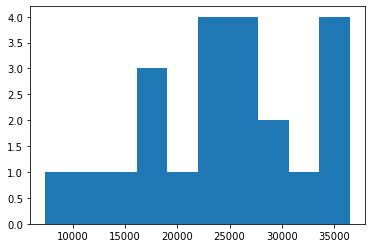

In [6]:
# AUC distribution
plt.hist(auc.AUC)

(array([1., 1., 1., 3., 1., 4., 4., 2., 1., 4.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

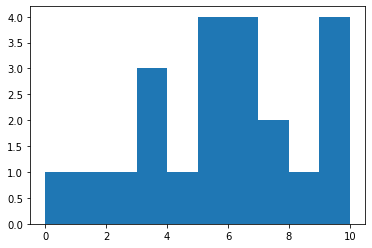

In [7]:
# normalize AUC
auc_norm = auc.AUC
auc_norm = (auc_norm - auc_norm.max())/(auc_norm.max() - auc_norm.min())+1
auc_norm = auc_norm*10
plt.hist(auc_norm)

In [8]:
# Create model

# with random initializer
seed_num = 1000
init = RandomUniform(seed = seed_num)

def create_model(activation1 = "sigmoid",activation2="softplus",l2 = 0.001,l1=0.001,opt = tf.keras.optimizers.Adam(learning_rate= 0.0001)):
     
    model = Sequential()
    
    # layer 1, input layer with regularizer
    model.add(Dense(1000,activation= activation1,input_shape=(10232,),
                    kernel_regularizer=regularizers.l2(l2),
                    activity_regularizer=regularizers.l1(l1),
                    kernel_initializer= init))           
    
    # dropout layer to prevent overfitting
    model.add(Dropout(0.3))
    
    # layer 2
    model.add(Dense(100, activation=activation2,kernel_initializer= init))
             
    # dropout layer
    model.add(Dropout(0.1))
    
    # output layer
    model.add(Dense(1, activation= activation2))
        
    model.compile(loss='mean_squared_error',optimizer = opt,metrics=['mae'])
        
    return model

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
# output the loss function durining training
def plt_loss(train_loss,validate_loss,fold_no):
    plt.figure(figsize=(8, 8))
    plt.plot(train_loss, label='Training Loss')
    plt.plot(validate_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [10]:
# load saved weights
pre_model = create_model()
pre_model.load_weights("HGCC_model_with_GDSC.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
# z-score norm
Standard = StandardScaler()
impress_norm = Standard.fit_transform(impress)
# predict with the pre-trained model without fine-tuning
pred_auc = pre_model.predict(impress_norm)

In [12]:
# pred without fine-tuning
spearmanr(auc_norm,pred_auc)

SpearmanrResult(correlation=-0.008469791078486732, pvalue=0.9701593779567589)

In [14]:
# create model with transferred weights, keep the rest of the structure the same

def create_model2(activation1 = "sigmoid",activation2 = "softplus",l2 = 0.0001,l1=0.0001,opt = tf.keras.optimizers.Adam(learning_rate= 0.0001)):
    
    model = Sequential()
    
    # apply the pre-trained weights on the first layer
    model.add(Dense(1000,activation= activation1,input_shape=(10232,),
                    kernel_regularizer=regularizers.l2(l2),
                    activity_regularizer=regularizers.l1(l1),
                    weights = [pre_model.layers[0].get_weights()[0],pre_model.layers[0].get_weights()[1]]))            
    
    model.add(Dropout(0.3))
    
    model.add(Dense(100, activation=activation2,
                    kernel_initializer=init
                    # weights = [pre_model.layers[2].get_weights()[0],pre_model.layers[2].get_weights()[1]]
                   )
             )
                    
    model.add(Dropout(0.1))
    
    model.add(Dense(1, activation= activation2, kernel_initializer=init))
        
    model.compile(loss='mse',
                  optimizer = opt,
                  metrics=['mean_absolute_error'])
        
    return model

In [15]:
# auc quantile
auc_norm.quantile([.25, .5, .75])

0.25    3.971546
0.50    6.033939
0.75    7.622300
Name: AUC, dtype: float64

In [16]:
# stratifiy samples into different groups regarding their AUC quantile
# for a fair train/test split
auc_bi = [0]*len(auc_norm)

for i in range(0,len(auc_norm)) :
    if auc_norm[i] > 7.622300:
        auc_bi[i] = 3
    elif auc_norm[i] > 6.033939:
        auc_bi[i] = 2
    elif auc_norm[i] > 3.971546:
        auc_bi[i] = 1
print(auc_bi)

[0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3]


In [17]:
# The train/test split was saved and used in each experiment for a fair evaluation
# load train/test
train_test_index = pd.read_csv("train_test_index_sort.txt", sep="[", header=None)

line = 0

train_index = [0] * 10
test_index = [0] * 10

for seed in range(0,10):
    
    train_index[seed] = [0] * 3
    test_index[seed] = [0] * 3
    
    for fold in range(0,3):
        
        # get index train
        train_index[seed][fold] = train_test_index[1][line].split()
        # string to int
        train_index[seed][fold] = [eval(i) for i in train_index[seed][fold]]
        
                # get index train
        test_index[seed][fold] = train_test_index[2][line].split()
        # string to int
        test_index[seed][fold] = [eval(i) for i in test_index[seed][fold]]
        
        line += 1

train_index

[[[0, 1, 3, 4, 7, 8, 10, 11, 12, 13, 14, 16, 17, 20],
  [0, 2, 5, 6, 8, 9, 10, 11, 13, 15, 17, 18, 19, 20, 21],
  [1, 2, 3, 4, 5, 6, 7, 9, 12, 14, 15, 16, 18, 19, 21]],
 [[0, 2, 3, 5, 7, 10, 11, 13, 14, 15, 16, 18, 20, 21],
  [0, 1, 4, 6, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20],
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 17, 19, 21]],
 [[1, 2, 3, 5, 6, 9, 10, 12, 14, 15, 17, 18, 20, 21],
  [0, 1, 4, 5, 7, 8, 10, 11, 12, 13, 14, 16, 18, 19, 21],
  [0, 2, 3, 4, 6, 7, 8, 9, 11, 13, 15, 16, 17, 19, 20]],
 [[0, 3, 4, 6, 7, 8, 9, 11, 13, 15, 16, 17, 18, 21],
  [0, 1, 2, 4, 5, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20],
  [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 19, 20, 21]],
 [[0, 2, 5, 6, 7, 8, 10, 11, 13, 15, 16, 18, 19, 20],
  [1, 2, 3, 4, 7, 9, 11, 12, 13, 14, 15, 17, 18, 20, 21],
  [0, 1, 3, 4, 5, 6, 8, 9, 10, 12, 14, 16, 17, 19, 21]],
 [[0, 1, 2, 4, 5, 8, 9, 11, 12, 14, 15, 19, 20, 21],
  [0, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 20],
  [1, 2, 3, 5, 6, 7, 10, 11, 13, 15, 16, 17, 

------------------------------------------------------------------------
Training for fold 1 ..., seed 1
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 52ms/sample - loss: 31.6387 - mean_absolute_error: 4.9747 - val_loss: 36.8890 - val_mean_absolute_error: 5.4061
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 31.1102 - mean_absolute_error: 4.9335 - val_loss: 36.6259 - val_mean_absolute_error: 5.3824
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 30.8466 - mean_absolute_error: 4.8898 - val_loss: 36.3572 - val_mean_absolute_error: 5.3580
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 30.5296 - mean_absolute_error: 4.8815 - val_loss: 36.0835 - val_mean_absolute_error: 5.3331
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 30.2155 - mean_absolute_error: 4.8396 - val_loss: 35.8009 - val_mean_absolute_error: 5.3072
Epoch 6/200
14/1

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.1572 - mean_absolute_error: 3.6343 - val_loss: 20.6139 - val_mean_absolute_error: 3.6489
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.5497 - mean_absolute_error: 3.5950 - val_loss: 20.2783 - val_mean_absolute_error: 3.6035
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.8118 - mean_absolute_error: 3.5915 - val_loss: 19.9591 - val_mean_absolute_error: 3.5597
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.8890 - mean_absolute_error: 3.4895 - val_loss: 19.6327 - val_mean_absolute_error: 3.5204
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.7437 - mean_absolute_error: 3.4283 - val_loss: 19.3143 - val_mean_absolute_error: 3.4922
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.8851 - mean_absolute_error: 3.4981 - val_loss: 19.0111 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.2013 - mean_absolute_error: 2.4861 - val_loss: 10.6281 - val_mean_absolute_error: 2.6957
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.6767 - mean_absolute_error: 2.4760 - val_loss: 10.5324 - val_mean_absolute_error: 2.6830
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.4972 - mean_absolute_error: 2.5937 - val_loss: 10.4376 - val_mean_absolute_error: 2.6703
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.8054 - mean_absolute_error: 2.5722 - val_loss: 10.3477 - val_mean_absolute_error: 2.6579
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.6444 - mean_absolute_error: 2.4251 - val_loss: 10.2561 - val_mean_absolute_error: 2.6453
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.2651 - mean_absolute_error: 2.4376 - val_loss: 10.1810 - val_mean_absolute_error: 2

14/14 [==============================] - 0s 5ms/sample - loss: 7.5991 - mean_absolute_error: 2.1912 - val_loss: 8.1855 - val_mean_absolute_error: 2.4067
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.1100 - mean_absolute_error: 2.0477 - val_loss: 8.1548 - val_mean_absolute_error: 2.4034
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.0887 - mean_absolute_error: 2.3145 - val_loss: 8.1329 - val_mean_absolute_error: 2.4008
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.0790 - mean_absolute_error: 2.1514 - val_loss: 8.1018 - val_mean_absolute_error: 2.3974
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.9905 - mean_absolute_error: 2.3852 - val_loss: 8.0836 - val_mean_absolute_error: 2.3953
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.3996 - mean_absolute_error: 2.2341 - val_loss: 8.0684 - val_mean_absolute_error: 2.3934
Epoch 153/20

Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.7914 - mean_absolute_error: 2.2083 - val_loss: 7.6236 - val_mean_absolute_error: 2.3321
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.6507 - mean_absolute_error: 2.2618 - val_loss: 7.6188 - val_mean_absolute_error: 2.3313
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.7640 - mean_absolute_error: 2.1271 - val_loss: 7.6138 - val_mean_absolute_error: 2.3304
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.4704 - mean_absolute_error: 2.1654 - val_loss: 7.6107 - val_mean_absolute_error: 2.3298
Spearman correlation: 0.310


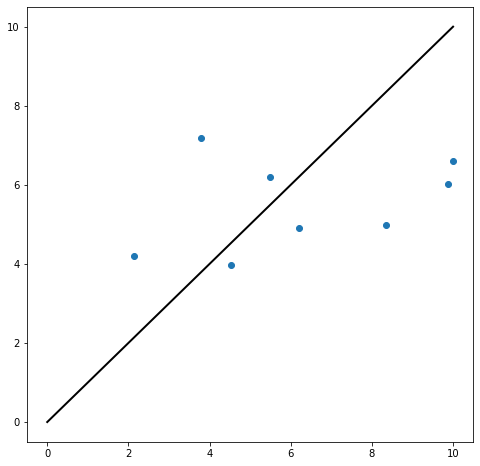

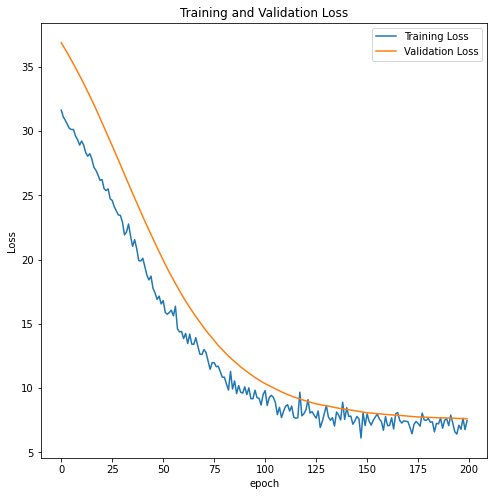

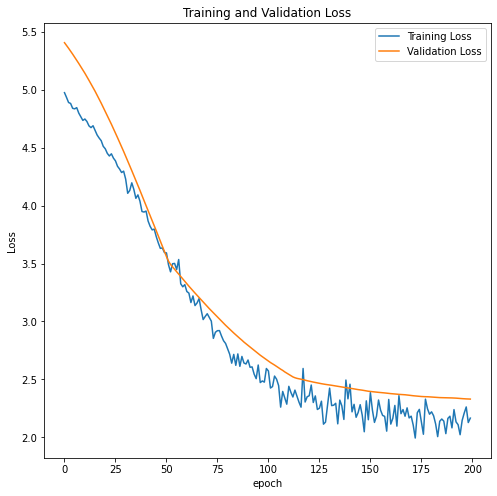

------------------------------------------------------------------------
Training for fold 2 ..., seed 1
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 47ms/sample - loss: 34.5893 - mean_absolute_error: 5.2912 - val_loss: 31.0921 - val_mean_absolute_error: 4.7624
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.3298 - mean_absolute_error: 5.2670 - val_loss: 30.8599 - val_mean_absolute_error: 4.7377
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.1191 - mean_absolute_error: 5.2523 - val_loss: 30.6237 - val_mean_absolute_error: 4.7125
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.6073 - mean_absolute_error: 5.2143 - val_loss: 30.3801 - val_mean_absolute_error: 4.6863
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.4650 - mean_absolute_error: 5.1919 - val_loss: 30.1380 - val_mean_absolute_error: 4.6601
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.1370 - mean_absolute_error: 3.6008 - val_loss: 16.7542 - val_mean_absolute_error: 3.3934
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.6042 - mean_absolute_error: 3.4828 - val_loss: 16.4941 - val_mean_absolute_error: 3.3609
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.0951 - mean_absolute_error: 3.4266 - val_loss: 16.2411 - val_mean_absolute_error: 3.3284
Epoch 52/200
15/15 [==============================] - 0s 4ms/sample - loss: 16.7883 - mean_absolute_error: 3.4385 - val_loss: 15.9989 - val_mean_absolute_error: 3.2968
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.6720 - mean_absolute_error: 3.4197 - val_loss: 15.7590 - val_mean_absolute_error: 3.2649
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.5186 - mean_absolute_error: 3.3777 - val_loss: 15.5232 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.7589 - mean_absolute_error: 2.4428 - val_loss: 10.2274 - val_mean_absolute_error: 2.6306
Epoch 99/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.5661 - mean_absolute_error: 2.2996 - val_loss: 10.1900 - val_mean_absolute_error: 2.6275
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7898 - mean_absolute_error: 2.1557 - val_loss: 10.1545 - val_mean_absolute_error: 2.6244
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.8931 - mean_absolute_error: 2.1918 - val_loss: 10.1218 - val_mean_absolute_error: 2.6212
Epoch 102/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.2586 - mean_absolute_error: 2.2367 - val_loss: 10.0927 - val_mean_absolute_error: 2.6187
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5092 - mean_absolute_error: 2.2614 - val_loss: 10.0626 - val_mean_absolute_error: 2

15/15 [==============================] - 0s 4ms/sample - loss: 6.0567 - mean_absolute_error: 1.9700 - val_loss: 9.7150 - val_mean_absolute_error: 2.5846
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7997 - mean_absolute_error: 1.8586 - val_loss: 9.7169 - val_mean_absolute_error: 2.5862
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4311 - mean_absolute_error: 2.0307 - val_loss: 9.7176 - val_mean_absolute_error: 2.5872
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.6707 - mean_absolute_error: 2.1320 - val_loss: 9.7189 - val_mean_absolute_error: 2.5881
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7089 - mean_absolute_error: 1.9394 - val_loss: 9.7211 - val_mean_absolute_error: 2.5895
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3171 - mean_absolute_error: 2.0169 - val_loss: 9.7214 - val_mean_absolute_error: 2.5902
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.1107 - mean_absolute_error: 1.8787 - val_loss: 9.8028 - val_mean_absolute_error: 2.6093
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.9113 - mean_absolute_error: 1.9327 - val_loss: 9.8018 - val_mean_absolute_error: 2.6084
Epoch 199/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.2114 - mean_absolute_error: 1.8921 - val_loss: 9.8064 - val_mean_absolute_error: 2.6095
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.4948 - mean_absolute_error: 1.8822 - val_loss: 9.8080 - val_mean_absolute_error: 2.6097
Spearman correlation: -0.071


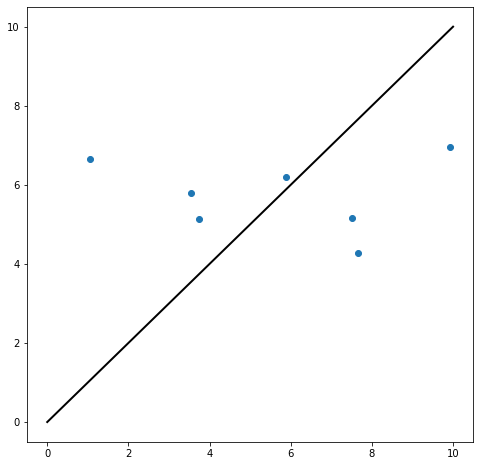

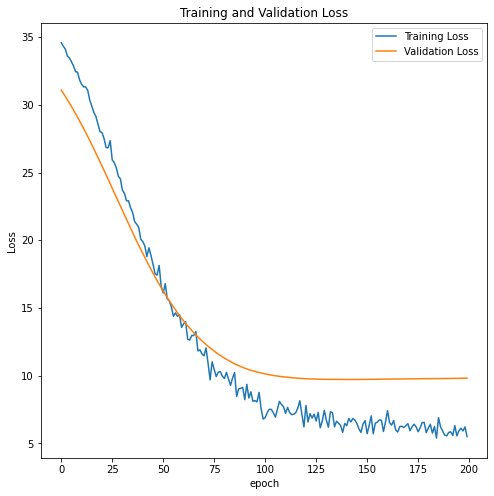

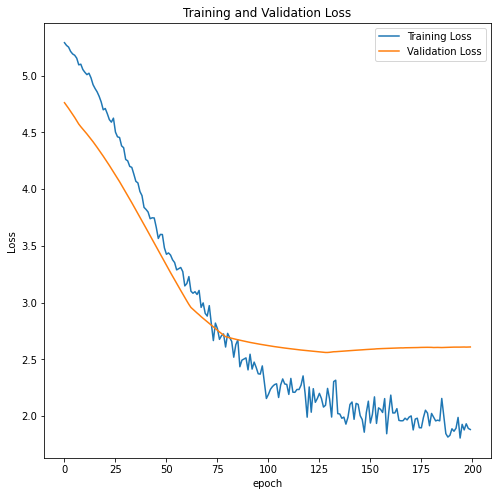

------------------------------------------------------------------------
Training for fold 3 ..., seed 1
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 50ms/sample - loss: 34.5074 - mean_absolute_error: 5.1399 - val_loss: 31.4548 - val_mean_absolute_error: 5.1268
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.0464 - mean_absolute_error: 5.0827 - val_loss: 31.2052 - val_mean_absolute_error: 5.1082
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.9285 - mean_absolute_error: 5.0847 - val_loss: 30.9508 - val_mean_absolute_error: 5.0891
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.5292 - mean_absolute_error: 5.0502 - val_loss: 30.6875 - val_mean_absolute_error: 5.0692
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.1305 - mean_absolute_error: 5.0117 - val_loss: 30.4256 - val_mean_absolute_error: 5.0494
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 4ms/sample - loss: 18.4415 - mean_absolute_error: 3.5272 - val_loss: 16.0157 - val_mean_absolute_error: 3.7156
Epoch 50/200
15/15 [==============================] - 0s 4ms/sample - loss: 17.0510 - mean_absolute_error: 3.3898 - val_loss: 15.7176 - val_mean_absolute_error: 3.6797
Epoch 51/200
15/15 [==============================] - 0s 4ms/sample - loss: 16.8347 - mean_absolute_error: 3.3466 - val_loss: 15.4224 - val_mean_absolute_error: 3.6437
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.8814 - mean_absolute_error: 3.3903 - val_loss: 15.1453 - val_mean_absolute_error: 3.6093
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.8852 - mean_absolute_error: 3.3674 - val_loss: 14.8774 - val_mean_absolute_error: 3.5756
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.7799 - mean_absolute_error: 3.2580 - val_loss: 14.6096 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.7367 - mean_absolute_error: 2.5759 - val_loss: 8.1000 - val_mean_absolute_error: 2.3434
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 10.0524 - mean_absolute_error: 2.5590 - val_loss: 8.0439 - val_mean_absolute_error: 2.3248
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2844 - mean_absolute_error: 2.3477 - val_loss: 7.9976 - val_mean_absolute_error: 2.3089
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2804 - mean_absolute_error: 2.3415 - val_loss: 7.9456 - val_mean_absolute_error: 2.2988
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.6644 - mean_absolute_error: 2.3622 - val_loss: 7.8900 - val_mean_absolute_error: 2.2880
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.5231 - mean_absolute_error: 2.5785 - val_loss: 7.8501 - val_mean_absolute_error: 2.2798

15/15 [==============================] - 0s 5ms/sample - loss: 7.7288 - mean_absolute_error: 2.3261 - val_loss: 7.0740 - val_mean_absolute_error: 2.0126
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.5151 - mean_absolute_error: 2.0647 - val_loss: 7.0721 - val_mean_absolute_error: 2.0088
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9820 - mean_absolute_error: 2.1748 - val_loss: 7.0696 - val_mean_absolute_error: 2.0049
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.7085 - mean_absolute_error: 2.3026 - val_loss: 7.0677 - val_mean_absolute_error: 2.0015
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.1252 - mean_absolute_error: 2.3181 - val_loss: 7.0663 - val_mean_absolute_error: 1.9981
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.0556 - mean_absolute_error: 2.3496 - val_loss: 7.0639 - val_mean_absolute_error: 1.9942
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.9513 - mean_absolute_error: 2.0418 - val_loss: 7.1755 - val_mean_absolute_error: 1.9373
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.5460 - mean_absolute_error: 2.0206 - val_loss: 7.1794 - val_mean_absolute_error: 1.9381
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3156 - mean_absolute_error: 2.0439 - val_loss: 7.1813 - val_mean_absolute_error: 1.9386
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4527 - mean_absolute_error: 2.1036 - val_loss: 7.1832 - val_mean_absolute_error: 1.9386
Spearman correlation: 0.500


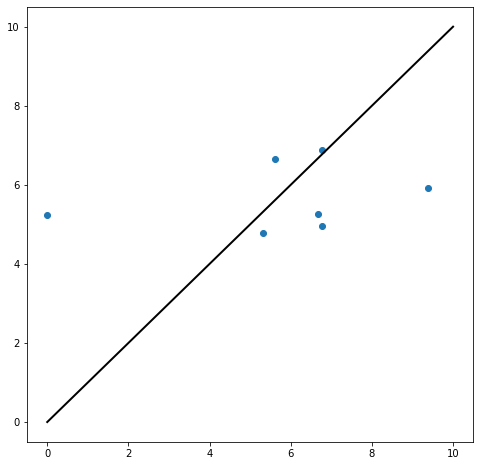

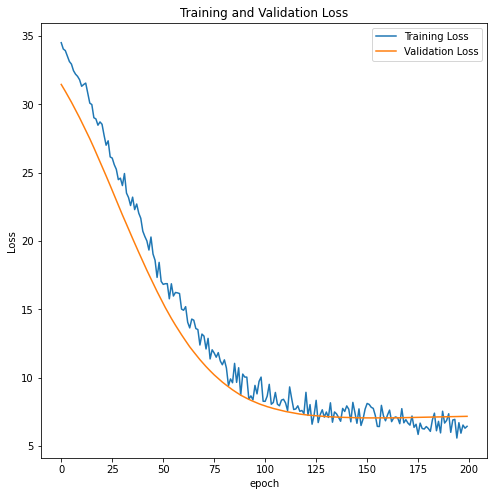

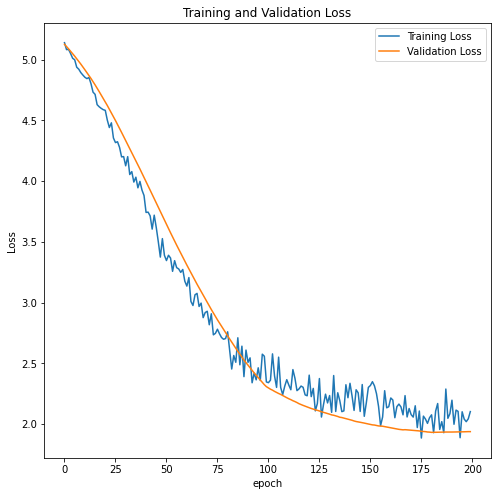

Overall spearman correlation: 0.161
------------------------------------------------------------------------
Training for fold 1 ..., seed 2
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 54ms/sample - loss: 35.2126 - mean_absolute_error: 5.3120 - val_loss: 29.9548 - val_mean_absolute_error: 4.7788
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.7968 - mean_absolute_error: 5.2841 - val_loss: 29.7103 - val_mean_absolute_error: 4.7529
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.5050 - mean_absolute_error: 5.2496 - val_loss: 29.4592 - val_mean_absolute_error: 4.7262
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.6950 - mean_absolute_error: 5.2660 - val_loss: 29.2176 - val_mean_absolute_error: 4.7003
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.5589 - mean_absolute_error: 5.2454 - val_loss: 28.9730 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.5874 - mean_absolute_error: 3.5146 - val_loss: 15.4161 - val_mean_absolute_error: 3.2866
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.9870 - mean_absolute_error: 3.4948 - val_loss: 15.1626 - val_mean_absolute_error: 3.2671
Epoch 51/200
14/14 [==============================] - 0s 4ms/sample - loss: 16.4593 - mean_absolute_error: 3.4713 - val_loss: 14.9200 - val_mean_absolute_error: 3.2483
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.0439 - mean_absolute_error: 3.4314 - val_loss: 14.6776 - val_mean_absolute_error: 3.2288
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.9980 - mean_absolute_error: 3.3607 - val_loss: 14.4383 - val_mean_absolute_error: 3.2092
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.1747 - mean_absolute_error: 3.2594 - val_loss: 14.2144 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.3528 - mean_absolute_error: 2.1772 - val_loss: 9.1757 - val_mean_absolute_error: 2.5539
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.1264 - mean_absolute_error: 2.2801 - val_loss: 9.1436 - val_mean_absolute_error: 2.5491
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.7031 - mean_absolute_error: 2.3431 - val_loss: 9.1149 - val_mean_absolute_error: 2.5449
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.8128 - mean_absolute_error: 2.1907 - val_loss: 9.0843 - val_mean_absolute_error: 2.5400
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.5471 - mean_absolute_error: 2.2543 - val_loss: 9.0574 - val_mean_absolute_error: 2.5355
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.9857 - mean_absolute_error: 2.1048 - val_loss: 9.0336 - val_mean_absolute_error: 2.5312


14/14 [==============================] - 0s 5ms/sample - loss: 7.1005 - mean_absolute_error: 2.1144 - val_loss: 8.7634 - val_mean_absolute_error: 2.5114
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.1250 - mean_absolute_error: 2.0272 - val_loss: 8.7647 - val_mean_absolute_error: 2.5115
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.6259 - mean_absolute_error: 1.8015 - val_loss: 8.7677 - val_mean_absolute_error: 2.5118
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.3964 - mean_absolute_error: 2.0233 - val_loss: 8.7694 - val_mean_absolute_error: 2.5119
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.6208 - mean_absolute_error: 2.1055 - val_loss: 8.7698 - val_mean_absolute_error: 2.5118
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.8935 - mean_absolute_error: 2.0677 - val_loss: 8.7716 - val_mean_absolute_error: 2.5119
Epoch 153/20

Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 4.8831 - mean_absolute_error: 1.7466 - val_loss: 8.8668 - val_mean_absolute_error: 2.5066
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.5880 - mean_absolute_error: 2.1098 - val_loss: 8.8679 - val_mean_absolute_error: 2.5063
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.7206 - mean_absolute_error: 1.9379 - val_loss: 8.8672 - val_mean_absolute_error: 2.5058
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.5710 - mean_absolute_error: 1.9342 - val_loss: 8.8662 - val_mean_absolute_error: 2.5053
Spearman correlation: -0.119


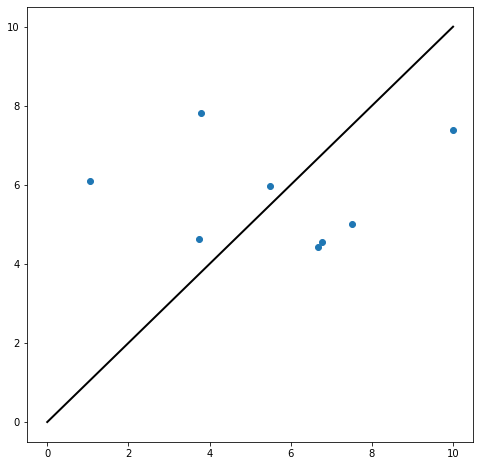

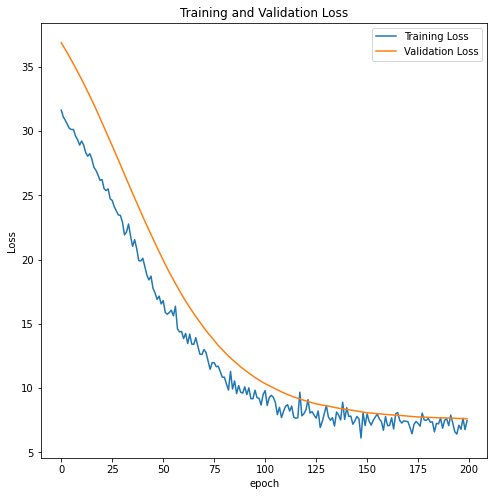

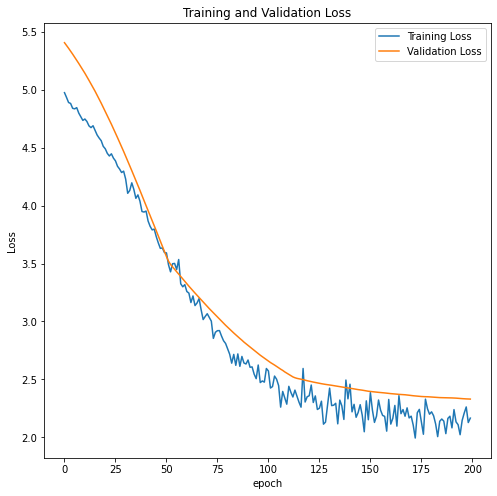

------------------------------------------------------------------------
Training for fold 2 ..., seed 2
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 54ms/sample - loss: 34.8366 - mean_absolute_error: 5.2173 - val_loss: 30.2939 - val_mean_absolute_error: 4.8967
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.7125 - mean_absolute_error: 5.2201 - val_loss: 30.0469 - val_mean_absolute_error: 4.8723
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.6728 - mean_absolute_error: 5.2092 - val_loss: 29.8024 - val_mean_absolute_error: 4.8480
Epoch 4/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.0155 - mean_absolute_error: 5.1299 - val_loss: 29.5437 - val_mean_absolute_error: 4.8221
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.0190 - mean_absolute_error: 5.1528 - val_loss: 29.2814 - val_mean_absolute_error: 4.7958
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 4ms/sample - loss: 19.2999 - mean_absolute_error: 3.8241 - val_loss: 15.0405 - val_mean_absolute_error: 3.1217
Epoch 50/200
15/15 [==============================] - 0s 4ms/sample - loss: 18.4992 - mean_absolute_error: 3.7696 - val_loss: 14.7545 - val_mean_absolute_error: 3.0871
Epoch 51/200
15/15 [==============================] - 0s 4ms/sample - loss: 17.6351 - mean_absolute_error: 3.6645 - val_loss: 14.4737 - val_mean_absolute_error: 3.0525
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.9198 - mean_absolute_error: 3.6657 - val_loss: 14.1928 - val_mean_absolute_error: 3.0173
Epoch 53/200
15/15 [==============================] - 0s 6ms/sample - loss: 17.6639 - mean_absolute_error: 3.6193 - val_loss: 13.9180 - val_mean_absolute_error: 2.9824
Epoch 54/200
15/15 [==============================] - 0s 6ms/sample - loss: 17.2119 - mean_absolute_error: 3.6053 - val_loss: 13.6477 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.8402 - mean_absolute_error: 2.5309 - val_loss: 6.9529 - val_mean_absolute_error: 2.0558
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 10.2658 - mean_absolute_error: 2.7292 - val_loss: 6.8810 - val_mean_absolute_error: 2.0415
Epoch 100/200
15/15 [==============================] - 0s 6ms/sample - loss: 9.8839 - mean_absolute_error: 2.6462 - val_loss: 6.8245 - val_mean_absolute_error: 2.0299
Epoch 101/200
15/15 [==============================] - 0s 4ms/sample - loss: 9.4633 - mean_absolute_error: 2.6204 - val_loss: 6.7632 - val_mean_absolute_error: 2.0172
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 10.2849 - mean_absolute_error: 2.7663 - val_loss: 6.7090 - val_mean_absolute_error: 2.0056
Epoch 103/200
15/15 [==============================] - 0s 4ms/sample - loss: 9.7765 - mean_absolute_error: 2.6750 - val_loss: 6.6554 - val_mean_absolute_error: 1.993

15/15 [==============================] - 0s 5ms/sample - loss: 7.7711 - mean_absolute_error: 2.3730 - val_loss: 5.6604 - val_mean_absolute_error: 1.8240
Epoch 148/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.8486 - mean_absolute_error: 2.3207 - val_loss: 5.6553 - val_mean_absolute_error: 1.8226
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8645 - mean_absolute_error: 2.3956 - val_loss: 5.6460 - val_mean_absolute_error: 1.8207
Epoch 150/200
15/15 [==============================] - 0s 4ms/sample - loss: 9.2596 - mean_absolute_error: 2.5419 - val_loss: 5.6399 - val_mean_absolute_error: 1.8192
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.7526 - mean_absolute_error: 2.3979 - val_loss: 5.6330 - val_mean_absolute_error: 1.8175
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.1181 - mean_absolute_error: 2.6166 - val_loss: 5.6218 - val_mean_absolute_error: 1.8150
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5076 - mean_absolute_error: 2.2436 - val_loss: 5.4624 - val_mean_absolute_error: 1.7692
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.7904 - mean_absolute_error: 2.4774 - val_loss: 5.4620 - val_mean_absolute_error: 1.7700
Epoch 199/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.2470 - mean_absolute_error: 2.4493 - val_loss: 5.4608 - val_mean_absolute_error: 1.7696
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.3099 - mean_absolute_error: 2.2279 - val_loss: 5.4595 - val_mean_absolute_error: 1.7704
Spearman correlation: 0.393


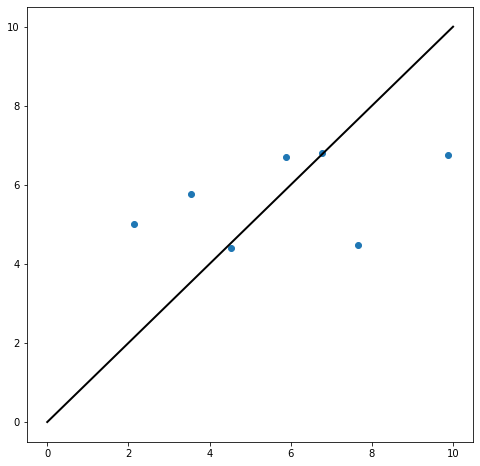

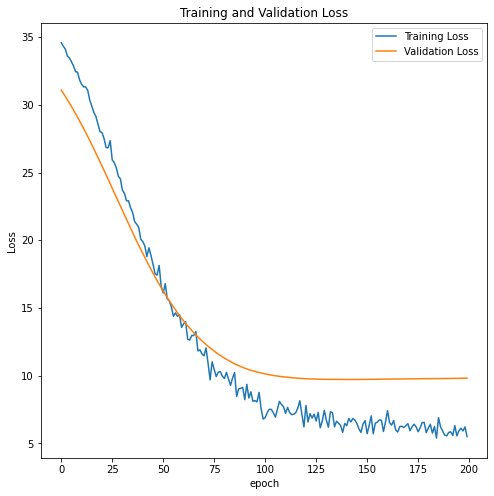

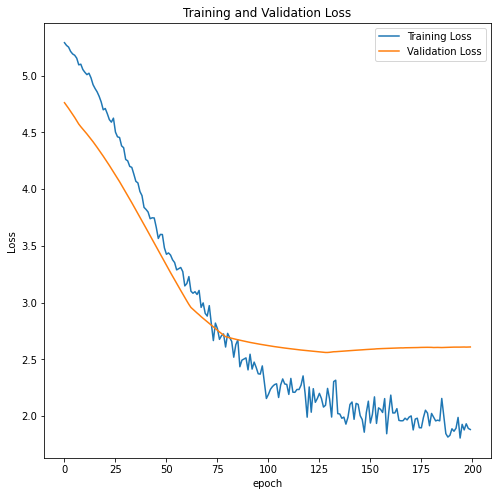

------------------------------------------------------------------------
Training for fold 3 ..., seed 2
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 56ms/sample - loss: 30.3537 - mean_absolute_error: 4.8510 - val_loss: 40.2526 - val_mean_absolute_error: 5.7274
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 30.0802 - mean_absolute_error: 4.8249 - val_loss: 39.9981 - val_mean_absolute_error: 5.7106
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 29.9569 - mean_absolute_error: 4.8096 - val_loss: 39.7329 - val_mean_absolute_error: 5.6931
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 29.5801 - mean_absolute_error: 4.7801 - val_loss: 39.4508 - val_mean_absolute_error: 5.6744
Epoch 5/200
15/15 [==============================] - 0s 4ms/sample - loss: 29.5216 - mean_absolute_error: 4.7556 - val_loss: 39.1798 - val_mean_absolute_error: 5.6563
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.4820 - mean_absolute_error: 3.3595 - val_loss: 23.4137 - val_mean_absolute_error: 4.4305
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.9134 - mean_absolute_error: 3.3018 - val_loss: 23.0656 - val_mean_absolute_error: 4.3978
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.2935 - mean_absolute_error: 3.3265 - val_loss: 22.7225 - val_mean_absolute_error: 4.3653
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.3458 - mean_absolute_error: 3.2903 - val_loss: 22.3880 - val_mean_absolute_error: 4.3332
Epoch 53/200
15/15 [==============================] - 0s 4ms/sample - loss: 15.2967 - mean_absolute_error: 3.2058 - val_loss: 22.0488 - val_mean_absolute_error: 4.3003
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.8325 - mean_absolute_error: 3.2468 - val_loss: 21.7230 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.6350 - mean_absolute_error: 2.3760 - val_loss: 12.3662 - val_mean_absolute_error: 3.0928
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.4914 - mean_absolute_error: 2.3688 - val_loss: 12.2494 - val_mean_absolute_error: 3.0723
Epoch 100/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.2934 - mean_absolute_error: 2.3964 - val_loss: 12.1412 - val_mean_absolute_error: 3.0531
Epoch 101/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.7851 - mean_absolute_error: 2.3667 - val_loss: 12.0539 - val_mean_absolute_error: 3.0372
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.0804 - mean_absolute_error: 2.2824 - val_loss: 11.9412 - val_mean_absolute_error: 3.0167
Epoch 103/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.8688 - mean_absolute_error: 2.4131 - val_loss: 11.8474 - val_mean_absolute_error: 2

Epoch 147/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.8331 - mean_absolute_error: 2.0649 - val_loss: 9.5986 - val_mean_absolute_error: 2.5434
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4922 - mean_absolute_error: 2.0751 - val_loss: 9.5707 - val_mean_absolute_error: 2.5383
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.0591 - mean_absolute_error: 1.9970 - val_loss: 9.5520 - val_mean_absolute_error: 2.5344
Epoch 150/200
15/15 [==============================] - 0s 4ms/sample - loss: 5.9538 - mean_absolute_error: 1.9906 - val_loss: 9.5375 - val_mean_absolute_error: 2.5313
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.5136 - mean_absolute_error: 2.0939 - val_loss: 9.5149 - val_mean_absolute_error: 2.5268
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2289 - mean_absolute_error: 2.1734 - val_loss: 9.5027 - val_mean_absolute_error: 2.524

15/15 [==============================] - 0s 5ms/sample - loss: 6.1578 - mean_absolute_error: 1.9970 - val_loss: 9.1241 - val_mean_absolute_error: 2.4263
Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4662 - mean_absolute_error: 1.9907 - val_loss: 9.1304 - val_mean_absolute_error: 2.4267
Epoch 198/200
15/15 [==============================] - 0s 4ms/sample - loss: 5.7091 - mean_absolute_error: 1.8567 - val_loss: 9.1159 - val_mean_absolute_error: 2.4231
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.6958 - mean_absolute_error: 1.8605 - val_loss: 9.1125 - val_mean_absolute_error: 2.4213
Epoch 200/200
15/15 [==============================] - 0s 4ms/sample - loss: 5.9490 - mean_absolute_error: 1.9118 - val_loss: 9.1088 - val_mean_absolute_error: 2.4195
Spearman correlation: 0.714


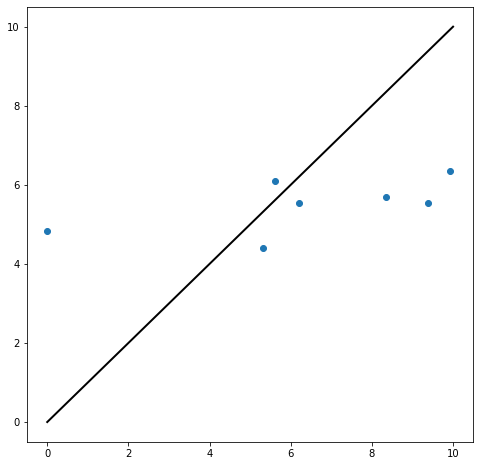

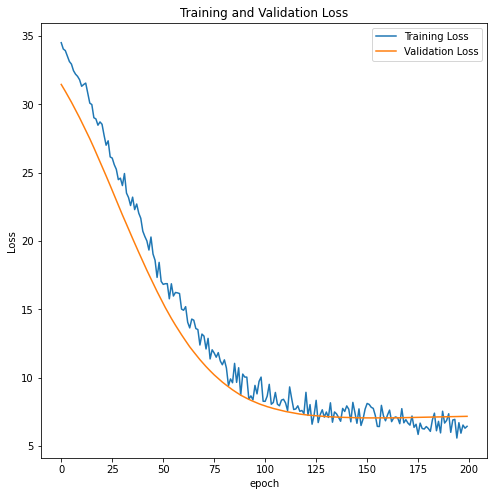

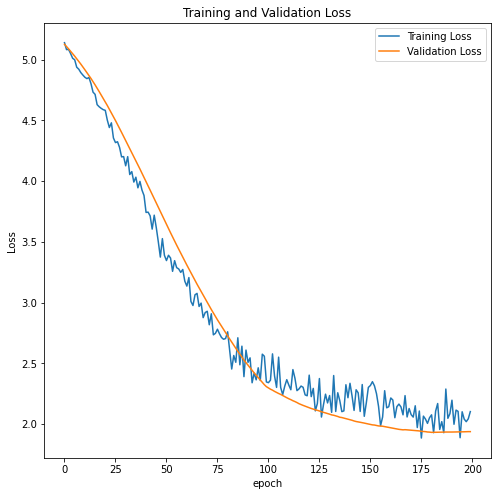

Overall spearman correlation: 0.243
------------------------------------------------------------------------
Training for fold 1 ..., seed 3
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 57ms/sample - loss: 31.8533 - mean_absolute_error: 4.9831 - val_loss: 36.1833 - val_mean_absolute_error: 5.3716
Epoch 2/200
14/14 [==============================] - 0s 4ms/sample - loss: 31.7448 - mean_absolute_error: 4.9715 - val_loss: 35.9280 - val_mean_absolute_error: 5.3532
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 31.2728 - mean_absolute_error: 4.9007 - val_loss: 35.6716 - val_mean_absolute_error: 5.3345
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 31.0493 - mean_absolute_error: 4.8741 - val_loss: 35.4094 - val_mean_absolute_error: 5.3154
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 31.4265 - mean_absolute_error: 4.9134 - val_loss: 35.1532 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.8994 - mean_absolute_error: 3.5440 - val_loss: 20.2857 - val_mean_absolute_error: 4.0045
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.1036 - mean_absolute_error: 3.5777 - val_loss: 19.9706 - val_mean_absolute_error: 3.9706
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.1939 - mean_absolute_error: 3.5048 - val_loss: 19.6540 - val_mean_absolute_error: 3.9360
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.2443 - mean_absolute_error: 3.4459 - val_loss: 19.3601 - val_mean_absolute_error: 3.9036
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.7752 - mean_absolute_error: 3.4235 - val_loss: 19.0577 - val_mean_absolute_error: 3.8698
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.4434 - mean_absolute_error: 3.3592 - val_loss: 18.7669 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.2612 - mean_absolute_error: 2.5046 - val_loss: 10.8020 - val_mean_absolute_error: 2.6357
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.5202 - mean_absolute_error: 2.5977 - val_loss: 10.7129 - val_mean_absolute_error: 2.6155
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.6849 - mean_absolute_error: 2.5221 - val_loss: 10.6317 - val_mean_absolute_error: 2.5964
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.2417 - mean_absolute_error: 2.4285 - val_loss: 10.5548 - val_mean_absolute_error: 2.5782
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.9867 - mean_absolute_error: 2.4030 - val_loss: 10.4816 - val_mean_absolute_error: 2.5605
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.4802 - mean_absolute_error: 2.4385 - val_loss: 10.4137 - val_mean_absolute_error: 2

Epoch 147/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.0763 - mean_absolute_error: 2.1581 - val_loss: 9.0129 - val_mean_absolute_error: 2.2216
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.9805 - mean_absolute_error: 2.1307 - val_loss: 9.0143 - val_mean_absolute_error: 2.2213
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.7510 - mean_absolute_error: 2.1040 - val_loss: 9.0083 - val_mean_absolute_error: 2.2188
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.7173 - mean_absolute_error: 2.1023 - val_loss: 8.9963 - val_mean_absolute_error: 2.2136
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.3846 - mean_absolute_error: 2.1879 - val_loss: 8.9861 - val_mean_absolute_error: 2.2091
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.3441 - mean_absolute_error: 2.2211 - val_loss: 8.9866 - val_mean_absolute_error: 2.208

14/14 [==============================] - 0s 5ms/sample - loss: 6.3464 - mean_absolute_error: 1.9700 - val_loss: 8.9446 - val_mean_absolute_error: 2.1610
Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.2127 - mean_absolute_error: 2.1086 - val_loss: 8.9479 - val_mean_absolute_error: 2.1610
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.6206 - mean_absolute_error: 2.0467 - val_loss: 8.9468 - val_mean_absolute_error: 2.1602
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.2714 - mean_absolute_error: 1.9838 - val_loss: 8.9511 - val_mean_absolute_error: 2.1605
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.4999 - mean_absolute_error: 1.9986 - val_loss: 8.9516 - val_mean_absolute_error: 2.1601
Spearman correlation: 0.667


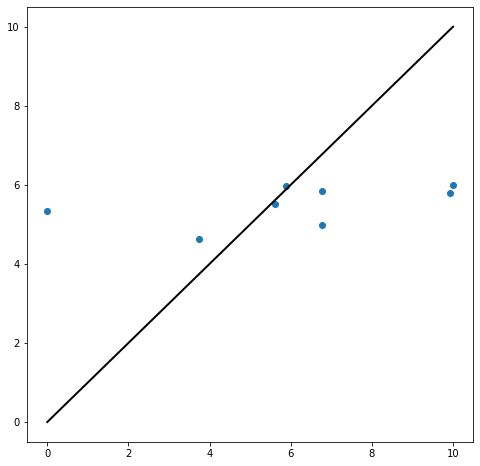

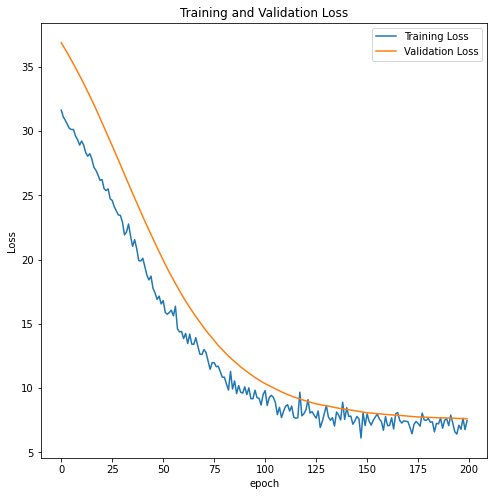

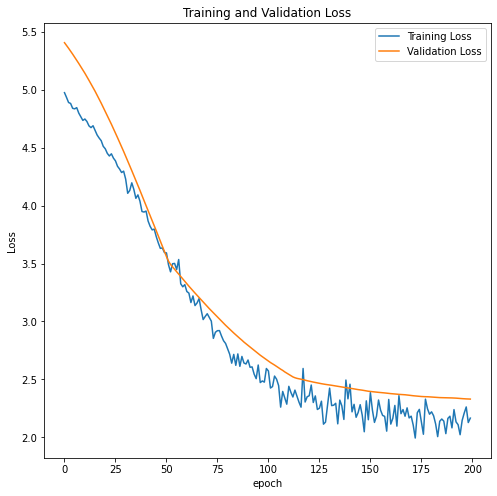

------------------------------------------------------------------------
Training for fold 2 ..., seed 3
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 58ms/sample - loss: 35.0903 - mean_absolute_error: 5.2800 - val_loss: 29.4042 - val_mean_absolute_error: 4.7536
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.7668 - mean_absolute_error: 5.2676 - val_loss: 29.1618 - val_mean_absolute_error: 4.7275
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.8215 - mean_absolute_error: 5.2556 - val_loss: 28.9313 - val_mean_absolute_error: 4.7025
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.5244 - mean_absolute_error: 5.2415 - val_loss: 28.6853 - val_mean_absolute_error: 4.6757
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.8765 - mean_absolute_error: 5.1820 - val_loss: 28.4310 - val_mean_absolute_error: 4.6478
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.5722 - mean_absolute_error: 3.7511 - val_loss: 15.0122 - val_mean_absolute_error: 2.8250
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.1791 - mean_absolute_error: 3.7378 - val_loss: 14.7536 - val_mean_absolute_error: 2.7940
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.7161 - mean_absolute_error: 3.6677 - val_loss: 14.5038 - val_mean_absolute_error: 2.7672
Epoch 52/200
15/15 [==============================] - 0s 4ms/sample - loss: 16.3446 - mean_absolute_error: 3.6480 - val_loss: 14.2580 - val_mean_absolute_error: 2.7469
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.0197 - mean_absolute_error: 3.5500 - val_loss: 14.0212 - val_mean_absolute_error: 2.7269
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.4987 - mean_absolute_error: 3.5136 - val_loss: 13.7867 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2384 - mean_absolute_error: 2.3283 - val_loss: 8.6688 - val_mean_absolute_error: 2.4190
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.9638 - mean_absolute_error: 2.2804 - val_loss: 8.6352 - val_mean_absolute_error: 2.4239
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8986 - mean_absolute_error: 2.2800 - val_loss: 8.6089 - val_mean_absolute_error: 2.4285
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8209 - mean_absolute_error: 2.2806 - val_loss: 8.5744 - val_mean_absolute_error: 2.4341
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.7879 - mean_absolute_error: 2.1902 - val_loss: 8.5478 - val_mean_absolute_error: 2.4385
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2169 - mean_absolute_error: 2.3185 - val_loss: 8.5234 - val_mean_absolute_error: 2.4428


15/15 [==============================] - 0s 5ms/sample - loss: 7.5404 - mean_absolute_error: 2.1084 - val_loss: 8.2493 - val_mean_absolute_error: 2.5616
Epoch 148/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.4485 - mean_absolute_error: 2.1456 - val_loss: 8.2490 - val_mean_absolute_error: 2.5615
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2113 - mean_absolute_error: 1.8393 - val_loss: 8.2509 - val_mean_absolute_error: 2.5624
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2505 - mean_absolute_error: 1.9291 - val_loss: 8.2540 - val_mean_absolute_error: 2.5632
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.4716 - mean_absolute_error: 2.1567 - val_loss: 8.2545 - val_mean_absolute_error: 2.5640
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2011 - mean_absolute_error: 1.9526 - val_loss: 8.2569 - val_mean_absolute_error: 2.5656
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.4895 - mean_absolute_error: 1.8775 - val_loss: 8.3507 - val_mean_absolute_error: 2.5850
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2249 - mean_absolute_error: 1.9206 - val_loss: 8.3530 - val_mean_absolute_error: 2.5851
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.8051 - mean_absolute_error: 1.8463 - val_loss: 8.3492 - val_mean_absolute_error: 2.5842
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.6607 - mean_absolute_error: 1.7312 - val_loss: 8.3496 - val_mean_absolute_error: 2.5842
Spearman correlation: 0.179


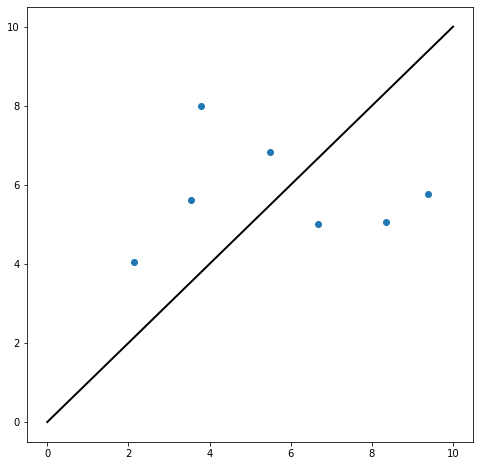

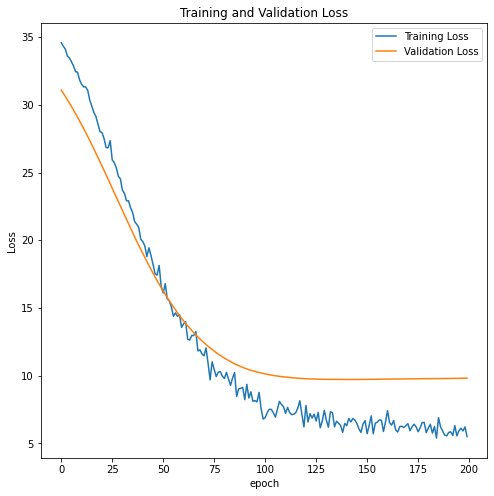

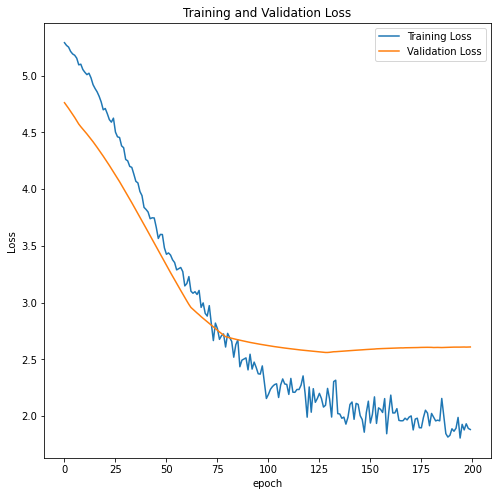

------------------------------------------------------------------------
Training for fold 3 ..., seed 3
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 57ms/sample - loss: 33.2997 - mean_absolute_error: 5.1053 - val_loss: 33.8607 - val_mean_absolute_error: 5.1575
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.9136 - mean_absolute_error: 5.0634 - val_loss: 33.6147 - val_mean_absolute_error: 5.1374
Epoch 3/200
15/15 [==============================] - 0s 4ms/sample - loss: 33.1790 - mean_absolute_error: 5.0853 - val_loss: 33.3755 - val_mean_absolute_error: 5.1227
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.5731 - mean_absolute_error: 5.0429 - val_loss: 33.1190 - val_mean_absolute_error: 5.1068
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.3146 - mean_absolute_error: 5.0224 - val_loss: 32.8621 - val_mean_absolute_error: 5.0908
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.5291 - mean_absolute_error: 3.4631 - val_loss: 18.5384 - val_mean_absolute_error: 3.9823
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.4391 - mean_absolute_error: 3.3459 - val_loss: 18.2404 - val_mean_absolute_error: 3.9522
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.8766 - mean_absolute_error: 3.3685 - val_loss: 17.9510 - val_mean_absolute_error: 3.9224
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.6312 - mean_absolute_error: 3.2815 - val_loss: 17.6684 - val_mean_absolute_error: 3.8929
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.6436 - mean_absolute_error: 3.3335 - val_loss: 17.3894 - val_mean_absolute_error: 3.8634
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.7056 - mean_absolute_error: 3.2119 - val_loss: 17.1167 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.1082 - mean_absolute_error: 2.2328 - val_loss: 10.1827 - val_mean_absolute_error: 2.7865
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.6500 - mean_absolute_error: 2.3604 - val_loss: 10.1165 - val_mean_absolute_error: 2.7700
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.5069 - mean_absolute_error: 2.3232 - val_loss: 10.0405 - val_mean_absolute_error: 2.7508
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.7717 - mean_absolute_error: 2.2981 - val_loss: 9.9761 - val_mean_absolute_error: 2.7338
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.9886 - mean_absolute_error: 2.2249 - val_loss: 9.9114 - val_mean_absolute_error: 2.7166
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.7675 - mean_absolute_error: 2.1762 - val_loss: 9.8572 - val_mean_absolute_error: 2.70

15/15 [==============================] - 0s 5ms/sample - loss: 6.2165 - mean_absolute_error: 2.0728 - val_loss: 8.7346 - val_mean_absolute_error: 2.2796
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7734 - mean_absolute_error: 2.1406 - val_loss: 8.7288 - val_mean_absolute_error: 2.2756
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9797 - mean_absolute_error: 2.1395 - val_loss: 8.7224 - val_mean_absolute_error: 2.2723
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.8562 - mean_absolute_error: 1.9379 - val_loss: 8.7164 - val_mean_absolute_error: 2.2689
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7112 - mean_absolute_error: 2.0891 - val_loss: 8.7093 - val_mean_absolute_error: 2.2651
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5725 - mean_absolute_error: 2.2448 - val_loss: 8.6993 - val_mean_absolute_error: 2.2617
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2355 - mean_absolute_error: 2.0040 - val_loss: 8.5225 - val_mean_absolute_error: 2.1834
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.1487 - mean_absolute_error: 2.0785 - val_loss: 8.5200 - val_mean_absolute_error: 2.1823
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.6861 - mean_absolute_error: 1.9143 - val_loss: 8.5183 - val_mean_absolute_error: 2.1810
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.3184 - mean_absolute_error: 2.2191 - val_loss: 8.5160 - val_mean_absolute_error: 2.1802
Spearman correlation: 0.071


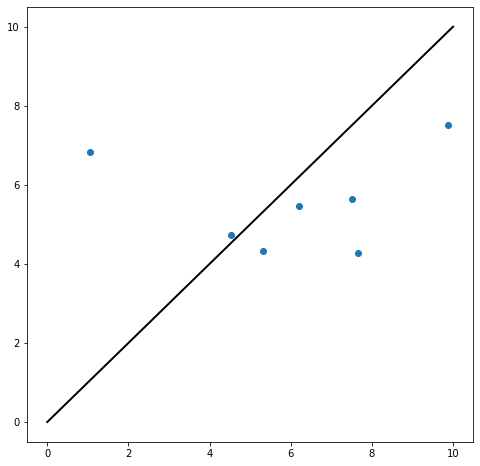

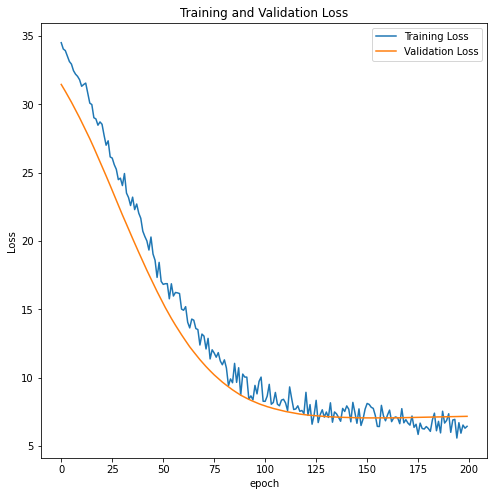

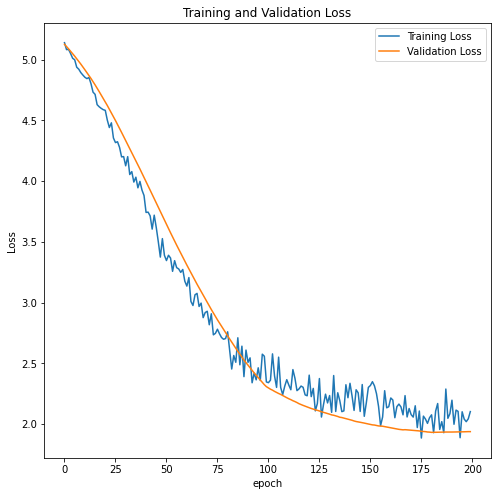

Overall spearman correlation: 0.212
------------------------------------------------------------------------
Training for fold 1 ..., seed 4
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 59ms/sample - loss: 32.5319 - mean_absolute_error: 5.1482 - val_loss: 35.1523 - val_mean_absolute_error: 5.0738
Epoch 2/200
14/14 [==============================] - 0s 4ms/sample - loss: 32.3014 - mean_absolute_error: 5.1407 - val_loss: 34.9113 - val_mean_absolute_error: 5.0506
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 32.4845 - mean_absolute_error: 5.1298 - val_loss: 34.6682 - val_mean_absolute_error: 5.0272
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 31.7657 - mean_absolute_error: 5.0860 - val_loss: 34.4122 - val_mean_absolute_error: 5.0054
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 31.4402 - mean_absolute_error: 5.0514 - val_loss: 34.1391 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.9596 - mean_absolute_error: 3.3774 - val_loss: 19.7580 - val_mean_absolute_error: 3.8920
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.5984 - mean_absolute_error: 3.4387 - val_loss: 19.4631 - val_mean_absolute_error: 3.8705
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.7121 - mean_absolute_error: 3.3745 - val_loss: 19.1705 - val_mean_absolute_error: 3.8491
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.7886 - mean_absolute_error: 3.3443 - val_loss: 18.8873 - val_mean_absolute_error: 3.8280
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.1396 - mean_absolute_error: 3.2851 - val_loss: 18.6021 - val_mean_absolute_error: 3.8064
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.5767 - mean_absolute_error: 3.2975 - val_loss: 18.3326 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.6381 - mean_absolute_error: 2.1714 - val_loss: 11.5828 - val_mean_absolute_error: 3.0323
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.4937 - mean_absolute_error: 2.2073 - val_loss: 11.5255 - val_mean_absolute_error: 3.0211
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.0517 - mean_absolute_error: 2.2834 - val_loss: 11.4646 - val_mean_absolute_error: 3.0089
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.6463 - mean_absolute_error: 2.1310 - val_loss: 11.4057 - val_mean_absolute_error: 2.9968
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.2787 - mean_absolute_error: 2.1042 - val_loss: 11.3453 - val_mean_absolute_error: 2.9842
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.4253 - mean_absolute_error: 2.1206 - val_loss: 11.2905 - val_mean_absolute_error: 2

Epoch 147/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.2954 - mean_absolute_error: 1.9030 - val_loss: 10.2966 - val_mean_absolute_error: 2.6515
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.6414 - mean_absolute_error: 1.9092 - val_loss: 10.2871 - val_mean_absolute_error: 2.6484
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.0913 - mean_absolute_error: 2.0837 - val_loss: 10.2784 - val_mean_absolute_error: 2.6458
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.8505 - mean_absolute_error: 2.0073 - val_loss: 10.2719 - val_mean_absolute_error: 2.6436
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.0199 - mean_absolute_error: 1.9555 - val_loss: 10.2662 - val_mean_absolute_error: 2.6414
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.4981 - mean_absolute_error: 2.0225 - val_loss: 10.2616 - val_mean_absolute_error:

Epoch 196/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.5890 - mean_absolute_error: 1.8283 - val_loss: 10.1617 - val_mean_absolute_error: 2.5842
Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.0152 - mean_absolute_error: 1.9236 - val_loss: 10.1599 - val_mean_absolute_error: 2.5837
Epoch 198/200
14/14 [==============================] - 0s 6ms/sample - loss: 5.8216 - mean_absolute_error: 1.8802 - val_loss: 10.1577 - val_mean_absolute_error: 2.5825
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.2890 - mean_absolute_error: 1.8276 - val_loss: 10.1553 - val_mean_absolute_error: 2.5799
Epoch 200/200
14/14 [==============================] - 0s 6ms/sample - loss: 5.2605 - mean_absolute_error: 1.7982 - val_loss: 10.1536 - val_mean_absolute_error: 2.5786
Spearman correlation: 0.167


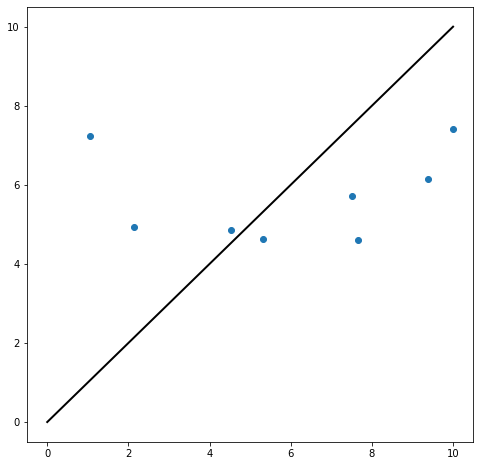

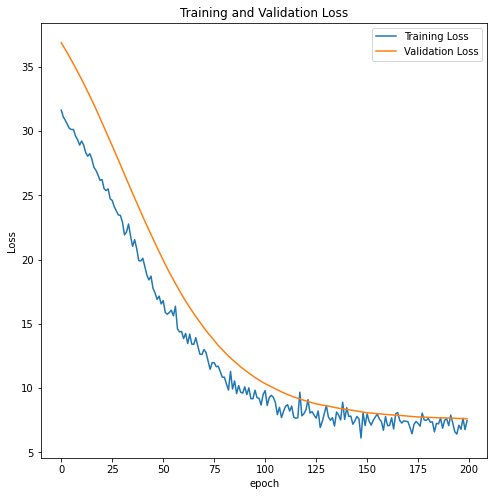

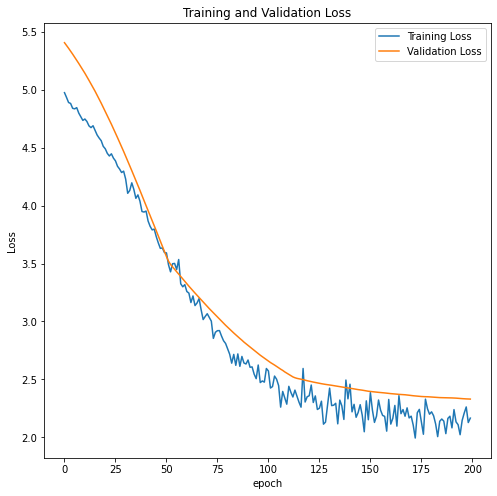

------------------------------------------------------------------------
Training for fold 2 ..., seed 4
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 60ms/sample - loss: 34.6653 - mean_absolute_error: 5.1242 - val_loss: 31.4547 - val_mean_absolute_error: 5.1590
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.4829 - mean_absolute_error: 5.1192 - val_loss: 31.2161 - val_mean_absolute_error: 5.1352
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.2415 - mean_absolute_error: 5.0932 - val_loss: 30.9779 - val_mean_absolute_error: 5.1112
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.5880 - mean_absolute_error: 5.0322 - val_loss: 30.7234 - val_mean_absolute_error: 5.0856
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.6101 - mean_absolute_error: 5.0326 - val_loss: 30.4650 - val_mean_absolute_error: 5.0594
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.7103 - mean_absolute_error: 3.6380 - val_loss: 16.0694 - val_mean_absolute_error: 3.2873
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.3348 - mean_absolute_error: 3.7383 - val_loss: 15.7834 - val_mean_absolute_error: 3.2421
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.7493 - mean_absolute_error: 3.6500 - val_loss: 15.5029 - val_mean_absolute_error: 3.2007
Epoch 52/200
15/15 [==============================] - 0s 4ms/sample - loss: 16.7893 - mean_absolute_error: 3.5189 - val_loss: 15.2155 - val_mean_absolute_error: 3.1708
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.1410 - mean_absolute_error: 3.5483 - val_loss: 14.9364 - val_mean_absolute_error: 3.1412
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.6191 - mean_absolute_error: 3.5656 - val_loss: 14.6669 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 4ms/sample - loss: 10.0363 - mean_absolute_error: 2.7393 - val_loss: 7.6972 - val_mean_absolute_error: 2.1684
Epoch 99/200
15/15 [==============================] - 0s 4ms/sample - loss: 9.0047 - mean_absolute_error: 2.5479 - val_loss: 7.6280 - val_mean_absolute_error: 2.1580
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.8967 - mean_absolute_error: 2.5502 - val_loss: 7.5709 - val_mean_absolute_error: 2.1491
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 10.0154 - mean_absolute_error: 2.6757 - val_loss: 7.5064 - val_mean_absolute_error: 2.1389
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.0395 - mean_absolute_error: 2.5510 - val_loss: 7.4424 - val_mean_absolute_error: 2.1289
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.5504 - mean_absolute_error: 2.6580 - val_loss: 7.3835 - val_mean_absolute_error: 2.119

15/15 [==============================] - 0s 5ms/sample - loss: 7.7604 - mean_absolute_error: 2.3164 - val_loss: 6.2617 - val_mean_absolute_error: 1.8684
Epoch 148/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.1372 - mean_absolute_error: 2.3544 - val_loss: 6.2522 - val_mean_absolute_error: 1.8649
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.3522 - mean_absolute_error: 2.2531 - val_loss: 6.2435 - val_mean_absolute_error: 1.8619
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.4518 - mean_absolute_error: 2.3965 - val_loss: 6.2353 - val_mean_absolute_error: 1.8588
Epoch 151/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.8344 - mean_absolute_error: 2.3475 - val_loss: 6.2243 - val_mean_absolute_error: 1.8548
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.9954 - mean_absolute_error: 2.3027 - val_loss: 6.2186 - val_mean_absolute_error: 1.8525
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 6ms/sample - loss: 6.9157 - mean_absolute_error: 1.9928 - val_loss: 6.0883 - val_mean_absolute_error: 1.7833
Epoch 198/200
15/15 [==============================] - 0s 6ms/sample - loss: 8.2563 - mean_absolute_error: 2.3071 - val_loss: 6.0877 - val_mean_absolute_error: 1.7826
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9049 - mean_absolute_error: 2.1548 - val_loss: 6.0846 - val_mean_absolute_error: 1.7809
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2666 - mean_absolute_error: 2.1960 - val_loss: 6.0845 - val_mean_absolute_error: 1.7805
Spearman correlation: 0.143


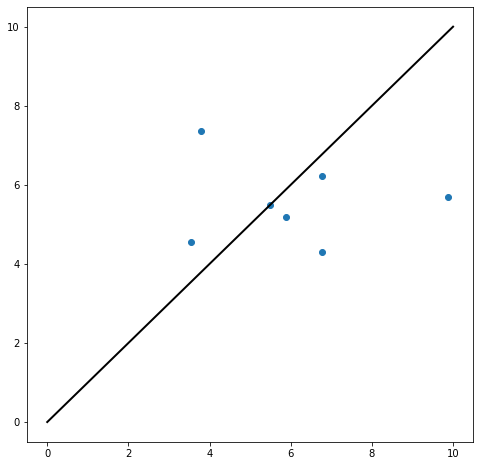

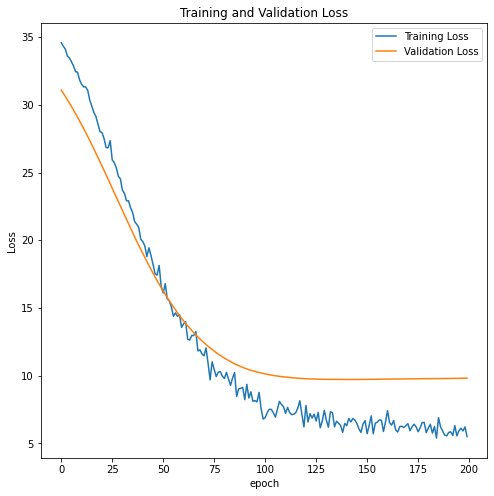

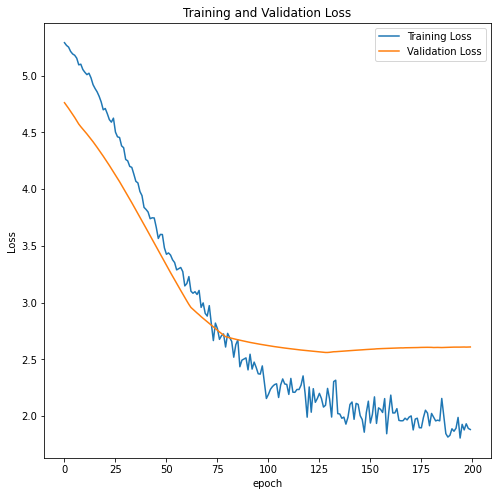

------------------------------------------------------------------------
Training for fold 3 ..., seed 4
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 62ms/sample - loss: 33.3974 - mean_absolute_error: 5.1215 - val_loss: 33.2590 - val_mean_absolute_error: 5.1171
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.4332 - mean_absolute_error: 5.1206 - val_loss: 33.0116 - val_mean_absolute_error: 5.0986
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.3403 - mean_absolute_error: 5.1062 - val_loss: 32.7598 - val_mean_absolute_error: 5.0798
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.5600 - mean_absolute_error: 5.0295 - val_loss: 32.4887 - val_mean_absolute_error: 5.0594
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.6444 - mean_absolute_error: 5.0366 - val_loss: 32.2236 - val_mean_absolute_error: 5.0393
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.6562 - mean_absolute_error: 3.4928 - val_loss: 17.4269 - val_mean_absolute_error: 3.6808
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.9395 - mean_absolute_error: 3.4497 - val_loss: 17.1209 - val_mean_absolute_error: 3.6447
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.1427 - mean_absolute_error: 3.4310 - val_loss: 16.8260 - val_mean_absolute_error: 3.6096
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.8199 - mean_absolute_error: 3.3796 - val_loss: 16.5334 - val_mean_absolute_error: 3.5742
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.6364 - mean_absolute_error: 3.3056 - val_loss: 16.2494 - val_mean_absolute_error: 3.5394
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.3679 - mean_absolute_error: 3.3433 - val_loss: 15.9653 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 7ms/sample - loss: 8.7211 - mean_absolute_error: 2.4631 - val_loss: 8.9424 - val_mean_absolute_error: 2.4564
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.3216 - mean_absolute_error: 2.5794 - val_loss: 8.8782 - val_mean_absolute_error: 2.4442
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.7599 - mean_absolute_error: 2.2801 - val_loss: 8.8148 - val_mean_absolute_error: 2.4319
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.0821 - mean_absolute_error: 2.5143 - val_loss: 8.7551 - val_mean_absolute_error: 2.4201
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.8026 - mean_absolute_error: 2.4227 - val_loss: 8.6979 - val_mean_absolute_error: 2.4083
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.3486 - mean_absolute_error: 2.3814 - val_loss: 8.6411 - val_mean_absolute_error: 2.3966


15/15 [==============================] - 0s 5ms/sample - loss: 7.7348 - mean_absolute_error: 2.2487 - val_loss: 7.5718 - val_mean_absolute_error: 2.2118
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.0544 - mean_absolute_error: 2.0733 - val_loss: 7.5673 - val_mean_absolute_error: 2.2107
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.0493 - mean_absolute_error: 2.0808 - val_loss: 7.5611 - val_mean_absolute_error: 2.2091
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.8009 - mean_absolute_error: 2.1696 - val_loss: 7.5560 - val_mean_absolute_error: 2.2077
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2749 - mean_absolute_error: 1.9922 - val_loss: 7.5520 - val_mean_absolute_error: 2.2061
Epoch 152/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.6816 - mean_absolute_error: 2.1978 - val_loss: 7.5481 - val_mean_absolute_error: 2.2046
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3664 - mean_absolute_error: 1.9431 - val_loss: 7.4281 - val_mean_absolute_error: 2.1551
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.0984 - mean_absolute_error: 2.1716 - val_loss: 7.4278 - val_mean_absolute_error: 2.1543
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7455 - mean_absolute_error: 1.8615 - val_loss: 7.4250 - val_mean_absolute_error: 2.1526
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.3996 - mean_absolute_error: 2.1128 - val_loss: 7.4262 - val_mean_absolute_error: 2.1524
Spearman correlation: 0.643


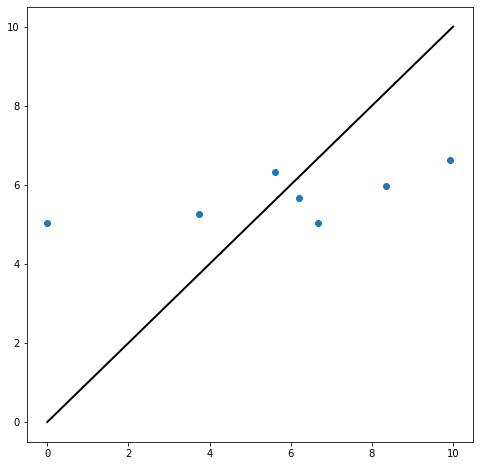

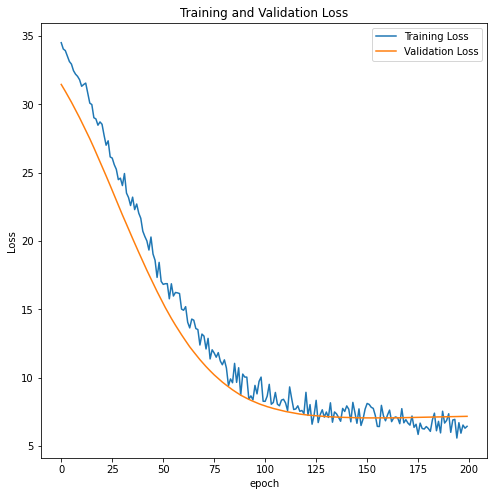

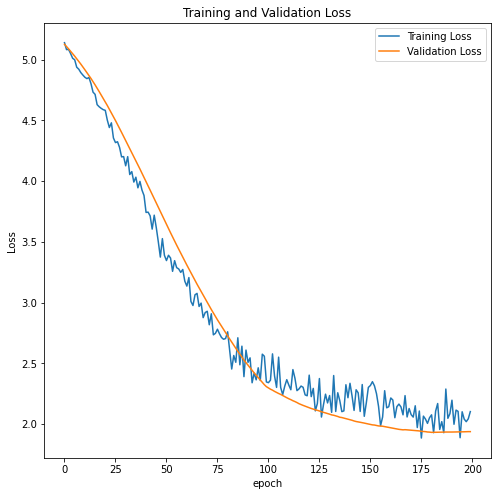

Overall spearman correlation: 0.331
------------------------------------------------------------------------
Training for fold 1 ..., seed 5
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 63ms/sample - loss: 35.5288 - mean_absolute_error: 5.3913 - val_loss: 29.7134 - val_mean_absolute_error: 4.6370
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 35.3862 - mean_absolute_error: 5.3819 - val_loss: 29.4883 - val_mean_absolute_error: 4.6115
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.6577 - mean_absolute_error: 5.3415 - val_loss: 29.2520 - val_mean_absolute_error: 4.5845
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.6867 - mean_absolute_error: 5.3314 - val_loss: 29.0152 - val_mean_absolute_error: 4.5574
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.2834 - mean_absolute_error: 5.2868 - val_loss: 28.7669 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.0586 - mean_absolute_error: 3.5084 - val_loss: 15.8455 - val_mean_absolute_error: 3.1879
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.8605 - mean_absolute_error: 3.5931 - val_loss: 15.6138 - val_mean_absolute_error: 3.1685
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.0046 - mean_absolute_error: 3.3548 - val_loss: 15.3932 - val_mean_absolute_error: 3.1498
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.3287 - mean_absolute_error: 3.4041 - val_loss: 15.1760 - val_mean_absolute_error: 3.1310
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.9261 - mean_absolute_error: 3.4973 - val_loss: 14.9663 - val_mean_absolute_error: 3.1123
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 14.7221 - mean_absolute_error: 3.3391 - val_loss: 14.7545 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.2008 - mean_absolute_error: 2.1465 - val_loss: 10.7825 - val_mean_absolute_error: 2.9128
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.4570 - mean_absolute_error: 2.0288 - val_loss: 10.7714 - val_mean_absolute_error: 2.9147
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.5177 - mean_absolute_error: 2.0584 - val_loss: 10.7578 - val_mean_absolute_error: 2.9170
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.6873 - mean_absolute_error: 2.0145 - val_loss: 10.7472 - val_mean_absolute_error: 2.9190
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.1686 - mean_absolute_error: 1.8779 - val_loss: 10.7401 - val_mean_absolute_error: 2.9218
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.0510 - mean_absolute_error: 2.0907 - val_loss: 10.7333 - val_mean_absolute_error: 2

Epoch 147/200
14/14 [==============================] - 0s 5ms/sample - loss: 4.9171 - mean_absolute_error: 1.7031 - val_loss: 11.0186 - val_mean_absolute_error: 2.9881
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.0982 - mean_absolute_error: 1.7696 - val_loss: 11.0349 - val_mean_absolute_error: 2.9896
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.4018 - mean_absolute_error: 1.8505 - val_loss: 11.0409 - val_mean_absolute_error: 2.9902
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.8096 - mean_absolute_error: 1.9109 - val_loss: 11.0488 - val_mean_absolute_error: 2.9908
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.5331 - mean_absolute_error: 1.8290 - val_loss: 11.0580 - val_mean_absolute_error: 2.9916
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.6469 - mean_absolute_error: 1.8612 - val_loss: 11.0630 - val_mean_absolute_error:

Epoch 196/200
14/14 [==============================] - 0s 5ms/sample - loss: 4.6125 - mean_absolute_error: 1.7139 - val_loss: 11.3472 - val_mean_absolute_error: 3.0132
Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 4.7791 - mean_absolute_error: 1.7831 - val_loss: 11.3477 - val_mean_absolute_error: 3.0132
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.2242 - mean_absolute_error: 2.0076 - val_loss: 11.3498 - val_mean_absolute_error: 3.0132
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.1959 - mean_absolute_error: 1.7691 - val_loss: 11.3542 - val_mean_absolute_error: 3.0135
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 4.9550 - mean_absolute_error: 1.7952 - val_loss: 11.3540 - val_mean_absolute_error: 3.0133
Spearman correlation: -0.190


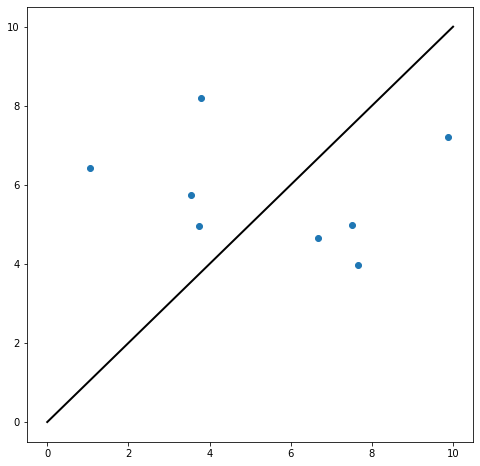

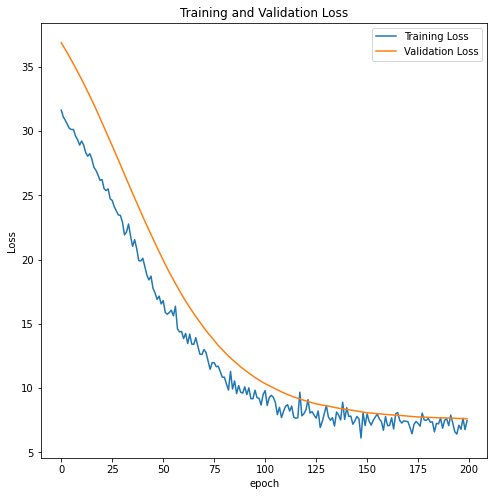

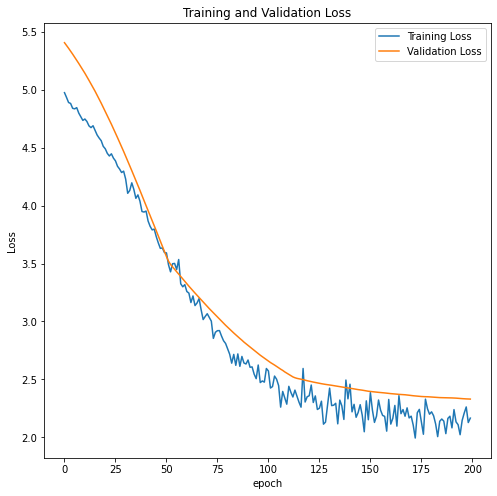

------------------------------------------------------------------------
Training for fold 2 ..., seed 5
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 60ms/sample - loss: 32.4261 - mean_absolute_error: 5.0486 - val_loss: 35.6034 - val_mean_absolute_error: 5.2957
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 31.8942 - mean_absolute_error: 5.0057 - val_loss: 35.3319 - val_mean_absolute_error: 5.2770
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 31.6937 - mean_absolute_error: 4.9849 - val_loss: 35.0631 - val_mean_absolute_error: 5.2583
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.0764 - mean_absolute_error: 5.0042 - val_loss: 34.8001 - val_mean_absolute_error: 5.2400
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 31.5664 - mean_absolute_error: 4.9599 - val_loss: 34.5238 - val_mean_absolute_error: 5.2207
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.6060 - mean_absolute_error: 3.6237 - val_loss: 19.4608 - val_mean_absolute_error: 3.9510
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.1487 - mean_absolute_error: 3.5307 - val_loss: 19.1516 - val_mean_absolute_error: 3.9180
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.5314 - mean_absolute_error: 3.4568 - val_loss: 18.8477 - val_mean_absolute_error: 3.8853
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.2647 - mean_absolute_error: 3.4027 - val_loss: 18.5477 - val_mean_absolute_error: 3.8525
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.4691 - mean_absolute_error: 3.4497 - val_loss: 18.2548 - val_mean_absolute_error: 3.8200
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.7335 - mean_absolute_error: 3.3879 - val_loss: 17.9601 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.5335 - mean_absolute_error: 2.4202 - val_loss: 10.3158 - val_mean_absolute_error: 2.6412
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.6447 - mean_absolute_error: 2.4159 - val_loss: 10.2381 - val_mean_absolute_error: 2.6306
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.6461 - mean_absolute_error: 2.4464 - val_loss: 10.1711 - val_mean_absolute_error: 2.6210
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.3427 - mean_absolute_error: 2.4863 - val_loss: 10.1053 - val_mean_absolute_error: 2.6113
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2677 - mean_absolute_error: 2.3273 - val_loss: 10.0418 - val_mean_absolute_error: 2.6018
Epoch 103/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.7180 - mean_absolute_error: 2.4154 - val_loss: 9.9797 - val_mean_absolute_error: 2.

15/15 [==============================] - 0s 5ms/sample - loss: 6.9726 - mean_absolute_error: 2.1086 - val_loss: 8.8527 - val_mean_absolute_error: 2.3126
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.8603 - mean_absolute_error: 2.0891 - val_loss: 8.8430 - val_mean_absolute_error: 2.3076
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9666 - mean_absolute_error: 2.0644 - val_loss: 8.8404 - val_mean_absolute_error: 2.3042
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.1454 - mean_absolute_error: 2.1701 - val_loss: 8.8411 - val_mean_absolute_error: 2.3019
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5431 - mean_absolute_error: 2.2369 - val_loss: 8.8405 - val_mean_absolute_error: 2.2990
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7284 - mean_absolute_error: 2.0095 - val_loss: 8.8325 - val_mean_absolute_error: 2.2949
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.6943 - mean_absolute_error: 1.8214 - val_loss: 8.9177 - val_mean_absolute_error: 2.2105
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.5799 - mean_absolute_error: 1.8831 - val_loss: 8.9225 - val_mean_absolute_error: 2.2082
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.0962 - mean_absolute_error: 1.9053 - val_loss: 8.9261 - val_mean_absolute_error: 2.2071
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7031 - mean_absolute_error: 1.8488 - val_loss: 8.9325 - val_mean_absolute_error: 2.2068
Spearman correlation: 0.536


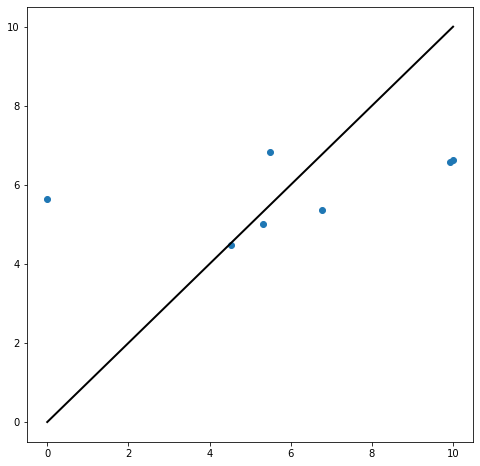

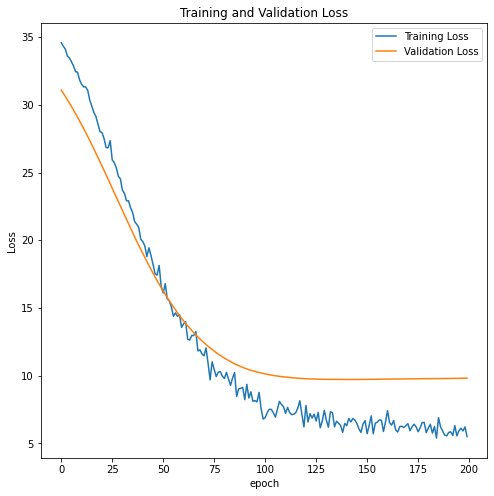

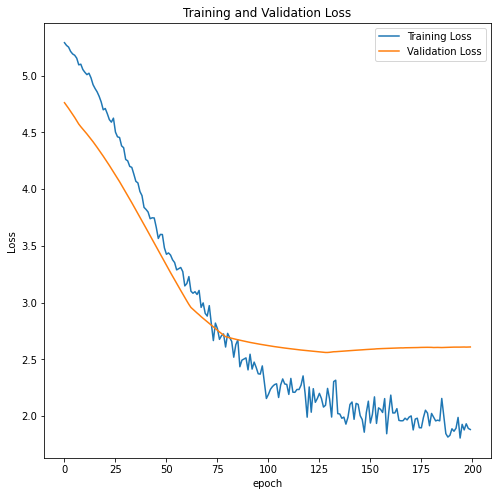

------------------------------------------------------------------------
Training for fold 3 ..., seed 5
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 61ms/sample - loss: 32.4710 - mean_absolute_error: 4.9334 - val_loss: 34.9646 - val_mean_absolute_error: 5.4694
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 32.4216 - mean_absolute_error: 4.9324 - val_loss: 34.7124 - val_mean_absolute_error: 5.4467
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.6712 - mean_absolute_error: 4.9428 - val_loss: 34.4624 - val_mean_absolute_error: 5.4240
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 31.3465 - mean_absolute_error: 4.8535 - val_loss: 34.1834 - val_mean_absolute_error: 5.3986
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 31.8134 - mean_absolute_error: 4.8833 - val_loss: 33.9165 - val_mean_absolute_error: 5.3743
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.1254 - mean_absolute_error: 3.6308 - val_loss: 18.6412 - val_mean_absolute_error: 3.7157
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.8984 - mean_absolute_error: 3.5566 - val_loss: 18.3103 - val_mean_absolute_error: 3.6713
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.3764 - mean_absolute_error: 3.5245 - val_loss: 17.9915 - val_mean_absolute_error: 3.6280
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.7523 - mean_absolute_error: 3.6135 - val_loss: 17.6747 - val_mean_absolute_error: 3.5846
Epoch 53/200
15/15 [==============================] - 0s 4ms/sample - loss: 17.0699 - mean_absolute_error: 3.5184 - val_loss: 17.3704 - val_mean_absolute_error: 3.5423
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.4083 - mean_absolute_error: 3.3962 - val_loss: 17.0646 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.8521 - mean_absolute_error: 2.6944 - val_loss: 8.6302 - val_mean_absolute_error: 2.2981
Epoch 99/200
15/15 [==============================] - 0s 4ms/sample - loss: 9.9379 - mean_absolute_error: 2.7002 - val_loss: 8.5313 - val_mean_absolute_error: 2.2778
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 10.3353 - mean_absolute_error: 2.7652 - val_loss: 8.4368 - val_mean_absolute_error: 2.2581
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.2039 - mean_absolute_error: 2.5845 - val_loss: 8.3536 - val_mean_absolute_error: 2.2407
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 10.5167 - mean_absolute_error: 2.7384 - val_loss: 8.2584 - val_mean_absolute_error: 2.2205
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.9811 - mean_absolute_error: 2.5788 - val_loss: 8.1732 - val_mean_absolute_error: 2.202

15/15 [==============================] - 0s 5ms/sample - loss: 8.2134 - mean_absolute_error: 2.4633 - val_loss: 6.1601 - val_mean_absolute_error: 1.7670
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.0837 - mean_absolute_error: 2.5636 - val_loss: 6.1348 - val_mean_absolute_error: 1.7619
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.7409 - mean_absolute_error: 2.3925 - val_loss: 6.1134 - val_mean_absolute_error: 1.7575
Epoch 150/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.3220 - mean_absolute_error: 2.4566 - val_loss: 6.0868 - val_mean_absolute_error: 1.7520
Epoch 151/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.9168 - mean_absolute_error: 2.5979 - val_loss: 6.0703 - val_mean_absolute_error: 1.7486
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.5106 - mean_absolute_error: 2.4519 - val_loss: 6.0504 - val_mean_absolute_error: 1.7445
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7465 - mean_absolute_error: 2.1746 - val_loss: 5.6650 - val_mean_absolute_error: 1.6672
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.9203 - mean_absolute_error: 2.3516 - val_loss: 5.6693 - val_mean_absolute_error: 1.6667
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2828 - mean_absolute_error: 2.3895 - val_loss: 5.6786 - val_mean_absolute_error: 1.6667
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5967 - mean_absolute_error: 2.2961 - val_loss: 5.6730 - val_mean_absolute_error: 1.6654
Spearman correlation: 0.107


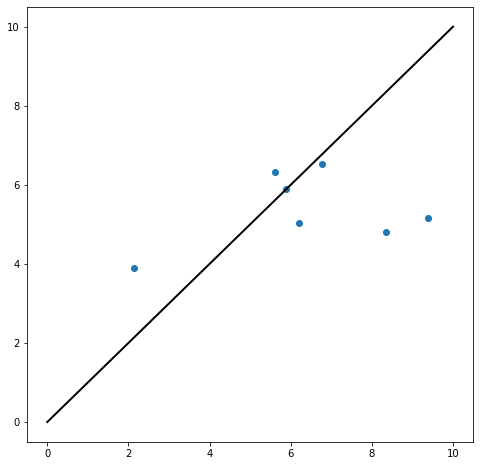

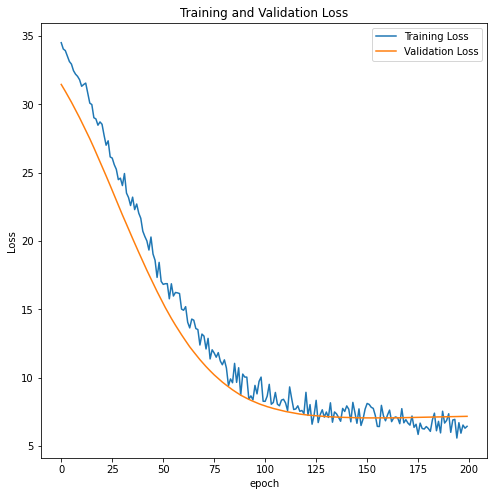

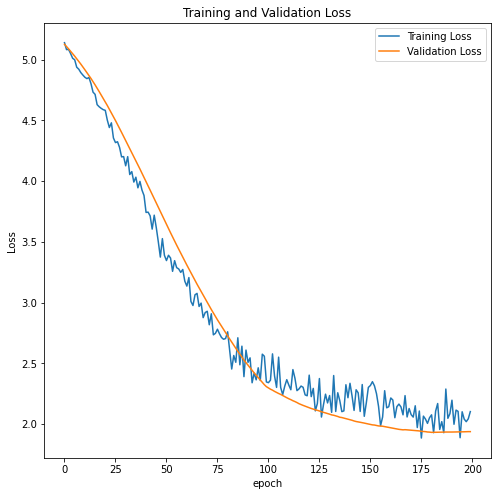

Overall spearman correlation: 0.149
------------------------------------------------------------------------
Training for fold 1 ..., seed 6
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 66ms/sample - loss: 34.1034 - mean_absolute_error: 4.9600 - val_loss: 32.1831 - val_mean_absolute_error: 5.3690
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.0822 - mean_absolute_error: 4.9787 - val_loss: 31.9356 - val_mean_absolute_error: 5.3464
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 33.9417 - mean_absolute_error: 4.9624 - val_loss: 31.6880 - val_mean_absolute_error: 5.3236
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 33.3591 - mean_absolute_error: 4.9169 - val_loss: 31.4250 - val_mean_absolute_error: 5.2994
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 32.9245 - mean_absolute_error: 4.8781 - val_loss: 31.1488 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 19.3603 - mean_absolute_error: 3.6582 - val_loss: 16.2881 - val_mean_absolute_error: 3.6325
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.3293 - mean_absolute_error: 3.5846 - val_loss: 15.9628 - val_mean_absolute_error: 3.5879
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.2922 - mean_absolute_error: 3.5343 - val_loss: 15.6481 - val_mean_absolute_error: 3.5443
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.6050 - mean_absolute_error: 3.5791 - val_loss: 15.3352 - val_mean_absolute_error: 3.5004
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.1606 - mean_absolute_error: 3.5624 - val_loss: 15.0256 - val_mean_absolute_error: 3.4564
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.2336 - mean_absolute_error: 3.4847 - val_loss: 14.7248 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 11.9101 - mean_absolute_error: 2.9816 - val_loss: 6.5026 - val_mean_absolute_error: 2.0314
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 10.8962 - mean_absolute_error: 2.8700 - val_loss: 6.4044 - val_mean_absolute_error: 2.0116
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 10.8059 - mean_absolute_error: 2.8827 - val_loss: 6.3165 - val_mean_absolute_error: 1.9931
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 11.3969 - mean_absolute_error: 2.9898 - val_loss: 6.2262 - val_mean_absolute_error: 1.9742
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 11.4858 - mean_absolute_error: 2.9503 - val_loss: 6.1381 - val_mean_absolute_error: 1.9554
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 10.3514 - mean_absolute_error: 2.7494 - val_loss: 6.0485 - val_mean_absolute_error: 1

Epoch 147/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.8251 - mean_absolute_error: 2.6547 - val_loss: 4.0649 - val_mean_absolute_error: 1.5026
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.3954 - mean_absolute_error: 2.6177 - val_loss: 4.0398 - val_mean_absolute_error: 1.4968
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.8271 - mean_absolute_error: 2.7224 - val_loss: 4.0172 - val_mean_absolute_error: 1.4914
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.7062 - mean_absolute_error: 2.5598 - val_loss: 3.9935 - val_mean_absolute_error: 1.4858
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.6884 - mean_absolute_error: 2.6782 - val_loss: 3.9830 - val_mean_absolute_error: 1.4831
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.8254 - mean_absolute_error: 2.7468 - val_loss: 3.9791 - val_mean_absolute_error: 1.482

14/14 [==============================] - 0s 5ms/sample - loss: 8.7570 - mean_absolute_error: 2.5061 - val_loss: 3.5075 - val_mean_absolute_error: 1.3575
Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.7674 - mean_absolute_error: 2.7326 - val_loss: 3.4998 - val_mean_absolute_error: 1.3551
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.0234 - mean_absolute_error: 2.6002 - val_loss: 3.4897 - val_mean_absolute_error: 1.3521
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.7463 - mean_absolute_error: 2.6629 - val_loss: 3.4898 - val_mean_absolute_error: 1.3521
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.7346 - mean_absolute_error: 2.4834 - val_loss: 3.4877 - val_mean_absolute_error: 1.3515
Spearman correlation: 0.619


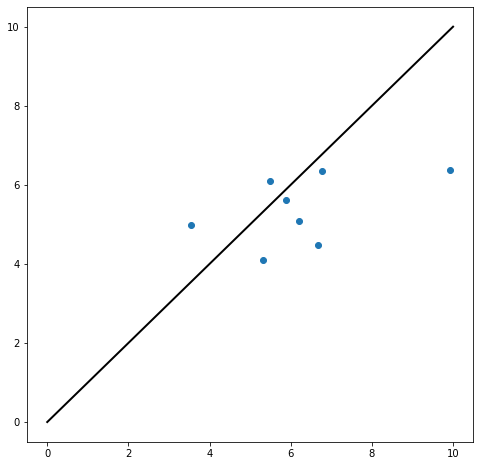

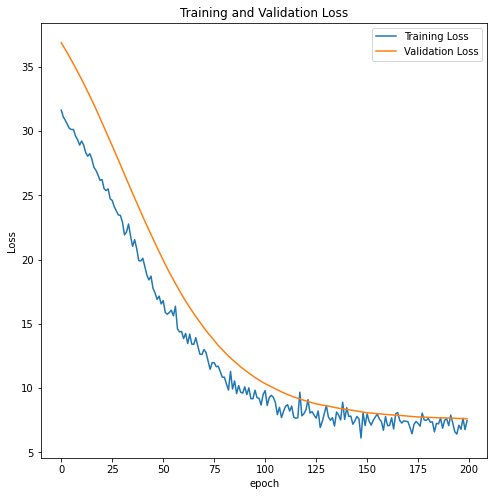

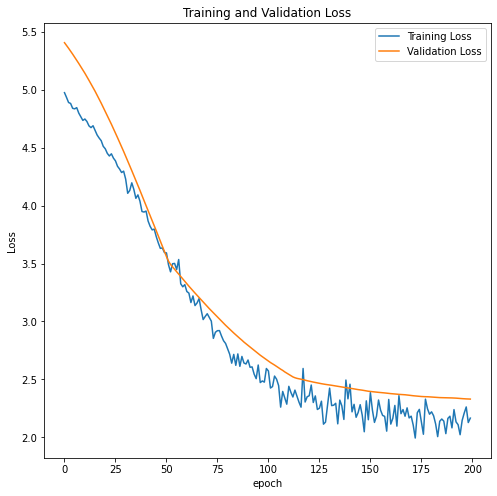

------------------------------------------------------------------------
Training for fold 2 ..., seed 6
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 64ms/sample - loss: 31.9709 - mean_absolute_error: 5.1598 - val_loss: 36.6131 - val_mean_absolute_error: 5.0513
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 31.9890 - mean_absolute_error: 5.1411 - val_loss: 36.3613 - val_mean_absolute_error: 5.0278
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 31.4750 - mean_absolute_error: 5.1183 - val_loss: 36.1031 - val_mean_absolute_error: 5.0037
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 31.1387 - mean_absolute_error: 5.0807 - val_loss: 35.8302 - val_mean_absolute_error: 4.9780
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 30.9276 - mean_absolute_error: 5.0771 - val_loss: 35.5526 - val_mean_absolute_error: 4.9517
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.5920 - mean_absolute_error: 3.5228 - val_loss: 20.4307 - val_mean_absolute_error: 3.7447
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.6533 - mean_absolute_error: 3.5055 - val_loss: 20.1240 - val_mean_absolute_error: 3.7238
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.3837 - mean_absolute_error: 3.4741 - val_loss: 19.8229 - val_mean_absolute_error: 3.7031
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.8051 - mean_absolute_error: 3.4218 - val_loss: 19.5206 - val_mean_absolute_error: 3.6820
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.6411 - mean_absolute_error: 3.3853 - val_loss: 19.2235 - val_mean_absolute_error: 3.6608
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 14.6091 - mean_absolute_error: 3.2383 - val_loss: 18.9324 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.9871 - mean_absolute_error: 2.3235 - val_loss: 11.6527 - val_mean_absolute_error: 2.8923
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.9824 - mean_absolute_error: 2.2586 - val_loss: 11.5864 - val_mean_absolute_error: 2.8807
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.3773 - mean_absolute_error: 2.2098 - val_loss: 11.5174 - val_mean_absolute_error: 2.8683
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.1712 - mean_absolute_error: 2.3213 - val_loss: 11.4534 - val_mean_absolute_error: 2.8564
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.0089 - mean_absolute_error: 2.3985 - val_loss: 11.3923 - val_mean_absolute_error: 2.8447
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8572 - mean_absolute_error: 2.2980 - val_loss: 11.3319 - val_mean_absolute_error: 2

Epoch 147/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2146 - mean_absolute_error: 2.1069 - val_loss: 10.1750 - val_mean_absolute_error: 2.6917
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3162 - mean_absolute_error: 2.0812 - val_loss: 10.1658 - val_mean_absolute_error: 2.6900
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7586 - mean_absolute_error: 2.0978 - val_loss: 10.1582 - val_mean_absolute_error: 2.6886
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2438 - mean_absolute_error: 1.9165 - val_loss: 10.1488 - val_mean_absolute_error: 2.6869
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.8163 - mean_absolute_error: 2.1340 - val_loss: 10.1425 - val_mean_absolute_error: 2.6857
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4449 - mean_absolute_error: 2.0284 - val_loss: 10.1350 - val_mean_absolute_error:

Epoch 196/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3046 - mean_absolute_error: 1.9780 - val_loss: 9.9526 - val_mean_absolute_error: 2.6374
Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2735 - mean_absolute_error: 1.9474 - val_loss: 9.9504 - val_mean_absolute_error: 2.6368
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9326 - mean_absolute_error: 2.0512 - val_loss: 9.9496 - val_mean_absolute_error: 2.6363
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.5726 - mean_absolute_error: 1.7917 - val_loss: 9.9488 - val_mean_absolute_error: 2.6359
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7476 - mean_absolute_error: 1.8165 - val_loss: 9.9473 - val_mean_absolute_error: 2.6357
Spearman correlation: 0.607


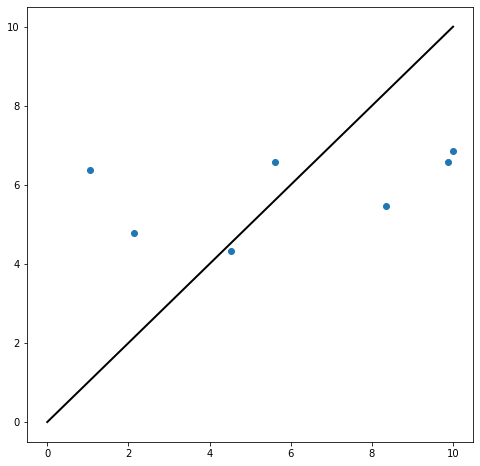

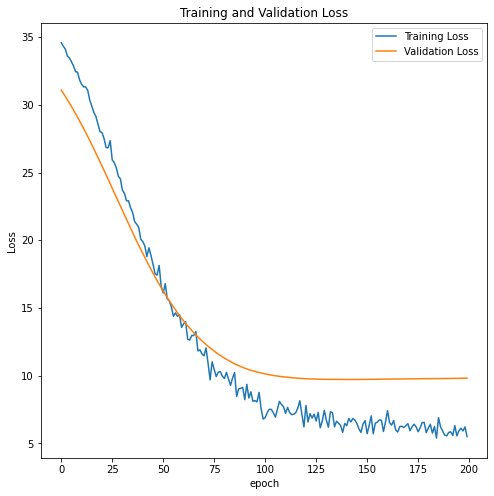

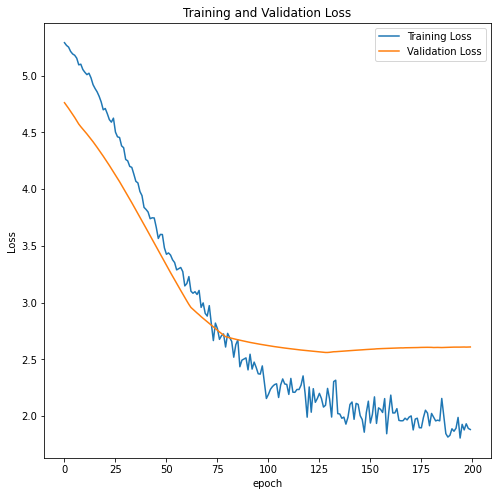

------------------------------------------------------------------------
Training for fold 3 ..., seed 6
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 66ms/sample - loss: 34.3464 - mean_absolute_error: 5.2332 - val_loss: 31.3003 - val_mean_absolute_error: 4.8803
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.2068 - mean_absolute_error: 5.2213 - val_loss: 31.0588 - val_mean_absolute_error: 4.8601
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.0574 - mean_absolute_error: 5.2007 - val_loss: 30.8212 - val_mean_absolute_error: 4.8401
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.5718 - mean_absolute_error: 5.1640 - val_loss: 30.5758 - val_mean_absolute_error: 4.8193
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.8588 - mean_absolute_error: 5.1039 - val_loss: 30.3224 - val_mean_absolute_error: 4.7977
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.0948 - mean_absolute_error: 3.5267 - val_loss: 16.7534 - val_mean_absolute_error: 3.3935
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.5222 - mean_absolute_error: 3.4941 - val_loss: 16.4964 - val_mean_absolute_error: 3.3741
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.2800 - mean_absolute_error: 3.4478 - val_loss: 16.2447 - val_mean_absolute_error: 3.3548
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 14.7952 - mean_absolute_error: 3.3090 - val_loss: 15.9932 - val_mean_absolute_error: 3.3350
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.4364 - mean_absolute_error: 3.3542 - val_loss: 15.7540 - val_mean_absolute_error: 3.3157
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 14.5213 - mean_absolute_error: 3.1840 - val_loss: 15.5161 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.4527 - mean_absolute_error: 2.1851 - val_loss: 10.4116 - val_mean_absolute_error: 2.9845
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3038 - mean_absolute_error: 1.9994 - val_loss: 10.3865 - val_mean_absolute_error: 2.9827
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.0135 - mean_absolute_error: 2.0598 - val_loss: 10.3580 - val_mean_absolute_error: 2.9804
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4195 - mean_absolute_error: 1.9761 - val_loss: 10.3301 - val_mean_absolute_error: 2.9782
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2211 - mean_absolute_error: 2.0106 - val_loss: 10.3055 - val_mean_absolute_error: 2.9761
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.6471 - mean_absolute_error: 1.9480 - val_loss: 10.2868 - val_mean_absolute_error: 2

Epoch 147/200
15/15 [==============================] - 0s 5ms/sample - loss: 4.6458 - mean_absolute_error: 1.5898 - val_loss: 10.1921 - val_mean_absolute_error: 2.9279
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.5126 - mean_absolute_error: 1.7360 - val_loss: 10.1987 - val_mean_absolute_error: 2.9279
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.5270 - mean_absolute_error: 1.7640 - val_loss: 10.2067 - val_mean_absolute_error: 2.9272
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.3978 - mean_absolute_error: 1.6960 - val_loss: 10.2170 - val_mean_absolute_error: 2.9266
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.0672 - mean_absolute_error: 1.7207 - val_loss: 10.2233 - val_mean_absolute_error: 2.9266
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.0788 - mean_absolute_error: 1.7482 - val_loss: 10.2297 - val_mean_absolute_error:

Epoch 196/200
15/15 [==============================] - 0s 4ms/sample - loss: 4.6590 - mean_absolute_error: 1.6194 - val_loss: 10.5082 - val_mean_absolute_error: 2.9381
Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 4.5907 - mean_absolute_error: 1.5474 - val_loss: 10.5164 - val_mean_absolute_error: 2.9379
Epoch 198/200
15/15 [==============================] - 0s 4ms/sample - loss: 4.4867 - mean_absolute_error: 1.5208 - val_loss: 10.5206 - val_mean_absolute_error: 2.9384
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 4.6049 - mean_absolute_error: 1.6535 - val_loss: 10.5212 - val_mean_absolute_error: 2.9392
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 4.0967 - mean_absolute_error: 1.5768 - val_loss: 10.5230 - val_mean_absolute_error: 2.9399
Spearman correlation: 0.143


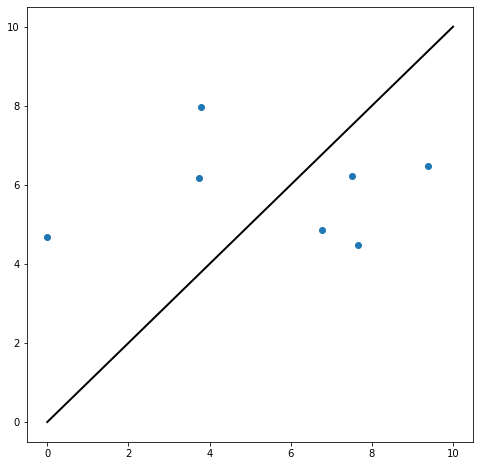

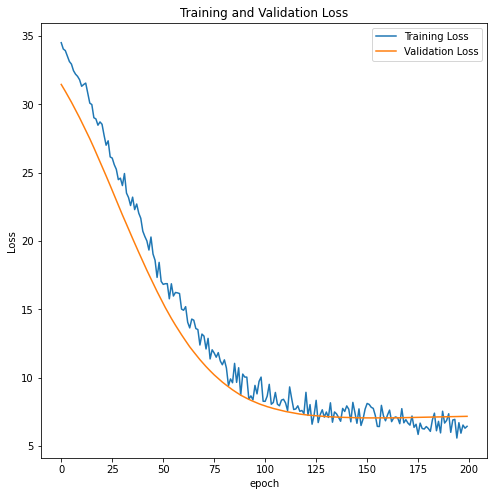

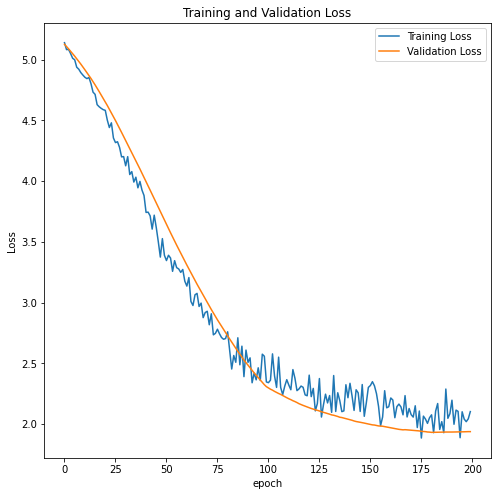

Overall spearman correlation: 0.348
------------------------------------------------------------------------
Training for fold 1 ..., seed 7
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 70ms/sample - loss: 34.7832 - mean_absolute_error: 5.1861 - val_loss: 31.2437 - val_mean_absolute_error: 5.0338
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.2986 - mean_absolute_error: 5.1401 - val_loss: 30.9900 - val_mean_absolute_error: 5.0086
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 33.8951 - mean_absolute_error: 5.1013 - val_loss: 30.7368 - val_mean_absolute_error: 4.9835
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 33.7355 - mean_absolute_error: 5.1047 - val_loss: 30.4722 - val_mean_absolute_error: 4.9570
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 33.7987 - mean_absolute_error: 5.1018 - val_loss: 30.2064 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.3089 - mean_absolute_error: 3.7226 - val_loss: 15.9500 - val_mean_absolute_error: 3.2062
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.3815 - mean_absolute_error: 3.7103 - val_loss: 15.6718 - val_mean_absolute_error: 3.1850
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.6126 - mean_absolute_error: 3.6559 - val_loss: 15.3935 - val_mean_absolute_error: 3.1634
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.0011 - mean_absolute_error: 3.5645 - val_loss: 15.1197 - val_mean_absolute_error: 3.1419
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.4362 - mean_absolute_error: 3.6759 - val_loss: 14.8606 - val_mean_absolute_error: 3.1210
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.7891 - mean_absolute_error: 3.4877 - val_loss: 14.5929 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.6002 - mean_absolute_error: 2.5535 - val_loss: 8.0735 - val_mean_absolute_error: 2.3541
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.3716 - mean_absolute_error: 2.4373 - val_loss: 8.0132 - val_mean_absolute_error: 2.3493
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.2148 - mean_absolute_error: 2.5369 - val_loss: 7.9596 - val_mean_absolute_error: 2.3448
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.3814 - mean_absolute_error: 2.4813 - val_loss: 7.9009 - val_mean_absolute_error: 2.3395
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.4574 - mean_absolute_error: 2.5655 - val_loss: 7.8464 - val_mean_absolute_error: 2.3347
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.4352 - mean_absolute_error: 2.3838 - val_loss: 7.8033 - val_mean_absolute_error: 2.3307


14/14 [==============================] - 0s 6ms/sample - loss: 7.9837 - mean_absolute_error: 2.2740 - val_loss: 6.9339 - val_mean_absolute_error: 2.2024
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.6035 - mean_absolute_error: 2.2719 - val_loss: 6.9304 - val_mean_absolute_error: 2.2011
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.1060 - mean_absolute_error: 2.2011 - val_loss: 6.9236 - val_mean_absolute_error: 2.1989
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.1666 - mean_absolute_error: 2.1870 - val_loss: 6.9163 - val_mean_absolute_error: 2.1963
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.8737 - mean_absolute_error: 2.2979 - val_loss: 6.9142 - val_mean_absolute_error: 2.1952
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.7835 - mean_absolute_error: 2.3067 - val_loss: 6.9096 - val_mean_absolute_error: 2.1930
Epoch 153/20

Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.2725 - mean_absolute_error: 2.1862 - val_loss: 6.9025 - val_mean_absolute_error: 2.1573
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.8581 - mean_absolute_error: 2.1412 - val_loss: 6.9049 - val_mean_absolute_error: 2.1578
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.4192 - mean_absolute_error: 2.1914 - val_loss: 6.9074 - val_mean_absolute_error: 2.1575
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.6996 - mean_absolute_error: 2.2772 - val_loss: 6.9092 - val_mean_absolute_error: 2.1571
Spearman correlation: -0.024


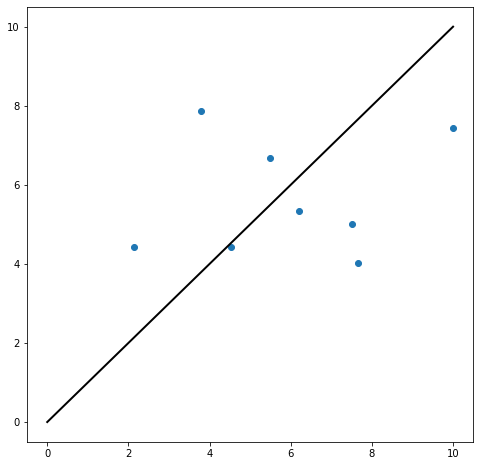

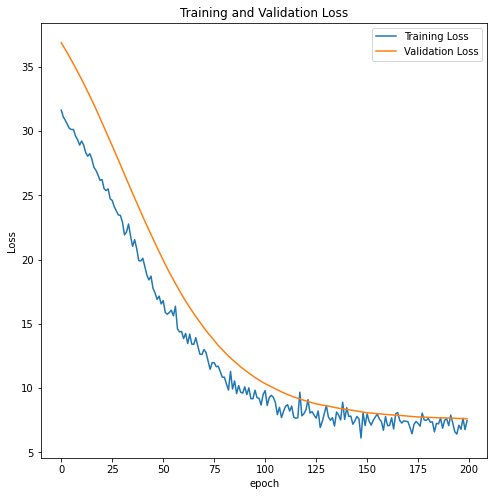

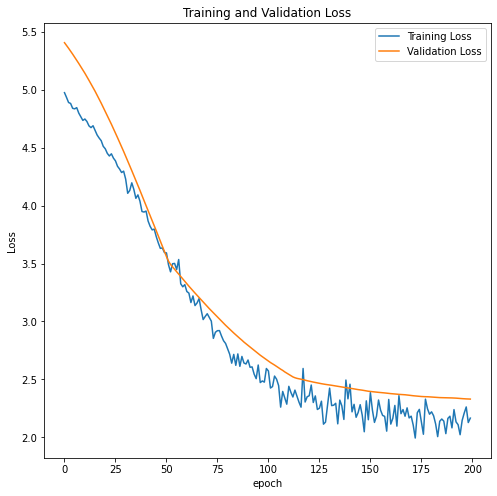

------------------------------------------------------------------------
Training for fold 2 ..., seed 7
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 70ms/sample - loss: 34.3598 - mean_absolute_error: 5.2201 - val_loss: 32.0278 - val_mean_absolute_error: 4.9857
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.9682 - mean_absolute_error: 5.1834 - val_loss: 31.7936 - val_mean_absolute_error: 4.9623
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.7683 - mean_absolute_error: 5.1581 - val_loss: 31.5541 - val_mean_absolute_error: 4.9382
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.2067 - mean_absolute_error: 5.1261 - val_loss: 31.2998 - val_mean_absolute_error: 4.9124
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.9314 - mean_absolute_error: 5.0994 - val_loss: 31.0468 - val_mean_absolute_error: 4.8866
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.2322 - mean_absolute_error: 3.5745 - val_loss: 17.1056 - val_mean_absolute_error: 3.5941
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.1975 - mean_absolute_error: 3.4633 - val_loss: 16.8220 - val_mean_absolute_error: 3.5615
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.7759 - mean_absolute_error: 3.4457 - val_loss: 16.5486 - val_mean_absolute_error: 3.5293
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.6225 - mean_absolute_error: 3.4180 - val_loss: 16.2731 - val_mean_absolute_error: 3.4965
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.5261 - mean_absolute_error: 3.3174 - val_loss: 16.0095 - val_mean_absolute_error: 3.4645
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.4293 - mean_absolute_error: 3.4279 - val_loss: 15.7600 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.3097 - mean_absolute_error: 2.4989 - val_loss: 9.5569 - val_mean_absolute_error: 2.3082
Epoch 99/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.3366 - mean_absolute_error: 2.4944 - val_loss: 9.5004 - val_mean_absolute_error: 2.2887
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.7016 - mean_absolute_error: 2.5619 - val_loss: 9.4566 - val_mean_absolute_error: 2.2725
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.8973 - mean_absolute_error: 2.2700 - val_loss: 9.4167 - val_mean_absolute_error: 2.2573
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.9561 - mean_absolute_error: 2.4734 - val_loss: 9.3756 - val_mean_absolute_error: 2.2456
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8029 - mean_absolute_error: 2.4086 - val_loss: 9.3325 - val_mean_absolute_error: 2.2343


15/15 [==============================] - 0s 5ms/sample - loss: 6.0214 - mean_absolute_error: 1.9818 - val_loss: 8.8374 - val_mean_absolute_error: 2.0834
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2459 - mean_absolute_error: 2.2502 - val_loss: 8.8399 - val_mean_absolute_error: 2.0830
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3207 - mean_absolute_error: 2.0800 - val_loss: 8.8416 - val_mean_absolute_error: 2.0825
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2295 - mean_absolute_error: 2.2388 - val_loss: 8.8441 - val_mean_absolute_error: 2.0822
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.1016 - mean_absolute_error: 2.0257 - val_loss: 8.8505 - val_mean_absolute_error: 2.0827
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3675 - mean_absolute_error: 2.0670 - val_loss: 8.8528 - val_mean_absolute_error: 2.0821
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.2701 - mean_absolute_error: 1.7952 - val_loss: 9.1045 - val_mean_absolute_error: 2.1659
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7548 - mean_absolute_error: 1.9583 - val_loss: 9.1113 - val_mean_absolute_error: 2.1683
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.4233 - mean_absolute_error: 1.8798 - val_loss: 9.1168 - val_mean_absolute_error: 2.1699
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.4978 - mean_absolute_error: 1.7280 - val_loss: 9.1226 - val_mean_absolute_error: 2.1710
Spearman correlation: -0.143


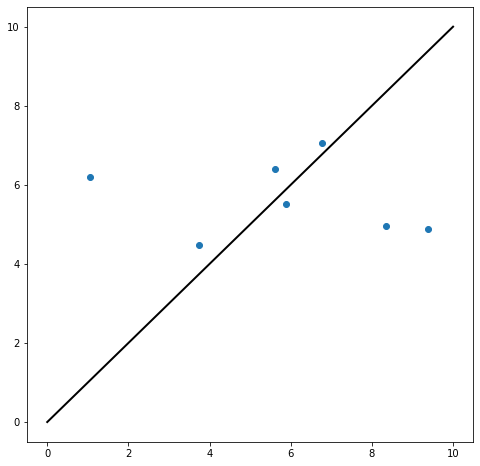

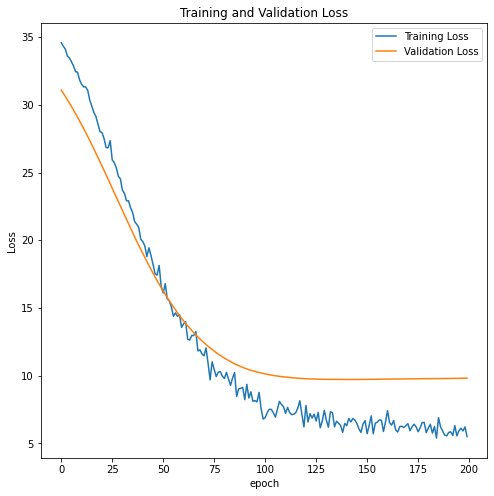

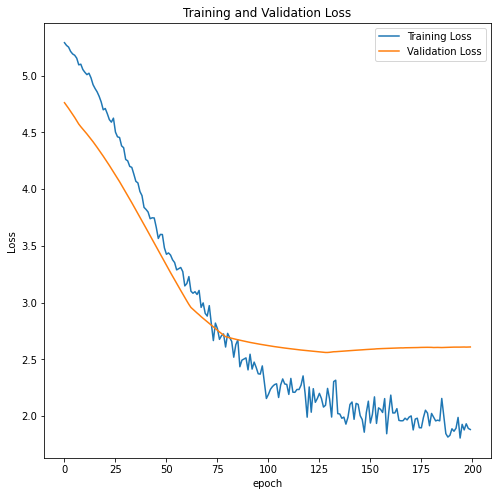

------------------------------------------------------------------------
Training for fold 3 ..., seed 7
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 76ms/sample - loss: 31.5339 - mean_absolute_error: 5.0124 - val_loss: 36.9339 - val_mean_absolute_error: 5.3432
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 31.7818 - mean_absolute_error: 5.0111 - val_loss: 36.6800 - val_mean_absolute_error: 5.3257
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 31.2809 - mean_absolute_error: 4.9903 - val_loss: 36.4121 - val_mean_absolute_error: 5.3072
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 30.9376 - mean_absolute_error: 4.9364 - val_loss: 36.1411 - val_mean_absolute_error: 5.2883
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 30.5808 - mean_absolute_error: 4.9031 - val_loss: 35.8617 - val_mean_absolute_error: 5.2687
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.1044 - mean_absolute_error: 3.4882 - val_loss: 20.6076 - val_mean_absolute_error: 3.9927
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.8918 - mean_absolute_error: 3.4827 - val_loss: 20.2859 - val_mean_absolute_error: 3.9590
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.3612 - mean_absolute_error: 3.3758 - val_loss: 19.9774 - val_mean_absolute_error: 3.9262
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.9680 - mean_absolute_error: 3.3551 - val_loss: 19.6675 - val_mean_absolute_error: 3.8929
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.1281 - mean_absolute_error: 3.3725 - val_loss: 19.3729 - val_mean_absolute_error: 3.8607
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.2123 - mean_absolute_error: 3.3919 - val_loss: 19.0848 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5836 - mean_absolute_error: 2.1863 - val_loss: 11.3030 - val_mean_absolute_error: 3.0012
Epoch 99/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.3045 - mean_absolute_error: 2.4005 - val_loss: 11.2075 - val_mean_absolute_error: 2.9879
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.9687 - mean_absolute_error: 2.1887 - val_loss: 11.1297 - val_mean_absolute_error: 2.9765
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.6459 - mean_absolute_error: 2.2988 - val_loss: 11.0599 - val_mean_absolute_error: 2.9662
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.6672 - mean_absolute_error: 2.3152 - val_loss: 11.0026 - val_mean_absolute_error: 2.9575
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.1268 - mean_absolute_error: 2.2612 - val_loss: 10.9245 - val_mean_absolute_error: 2

Epoch 147/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2394 - mean_absolute_error: 1.9344 - val_loss: 9.5038 - val_mean_absolute_error: 2.6397
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.5307 - mean_absolute_error: 1.9713 - val_loss: 9.4935 - val_mean_absolute_error: 2.6354
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.5996 - mean_absolute_error: 2.0569 - val_loss: 9.4827 - val_mean_absolute_error: 2.6316
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.6248 - mean_absolute_error: 2.0171 - val_loss: 9.4768 - val_mean_absolute_error: 2.6290
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.6179 - mean_absolute_error: 1.9614 - val_loss: 9.4699 - val_mean_absolute_error: 2.6251
Epoch 152/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.5068 - mean_absolute_error: 1.9955 - val_loss: 9.4553 - val_mean_absolute_error: 2.620

15/15 [==============================] - 0s 5ms/sample - loss: 6.0537 - mean_absolute_error: 1.9334 - val_loss: 9.3088 - val_mean_absolute_error: 2.5185
Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.0469 - mean_absolute_error: 1.9017 - val_loss: 9.3079 - val_mean_absolute_error: 2.5165
Epoch 198/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.9939 - mean_absolute_error: 2.0032 - val_loss: 9.3089 - val_mean_absolute_error: 2.5158
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.8606 - mean_absolute_error: 1.8897 - val_loss: 9.3061 - val_mean_absolute_error: 2.5125
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.8160 - mean_absolute_error: 2.0003 - val_loss: 9.3139 - val_mean_absolute_error: 2.5140
Spearman correlation: 0.464


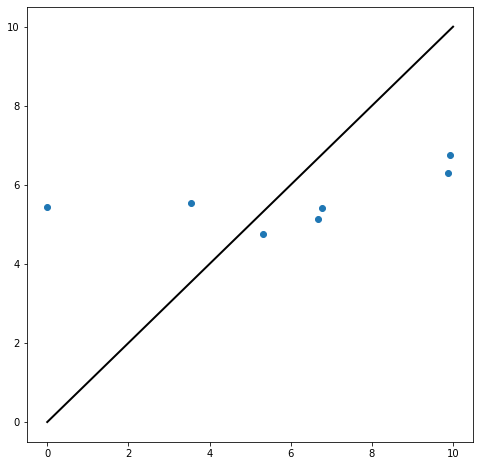

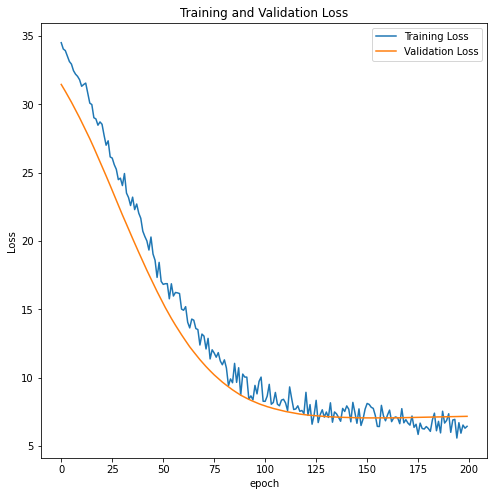

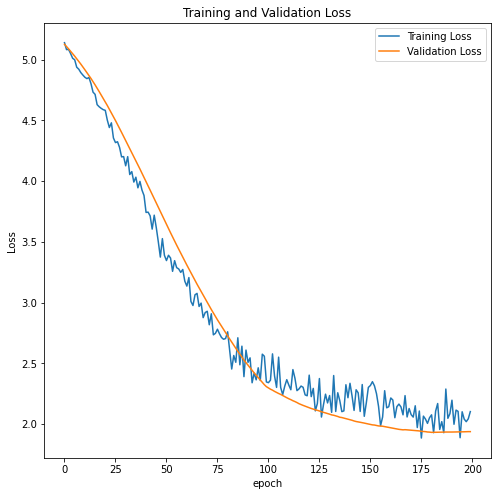

Overall spearman correlation: 0.153
------------------------------------------------------------------------
Training for fold 1 ..., seed 8
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 73ms/sample - loss: 33.4381 - mean_absolute_error: 4.9776 - val_loss: 33.8265 - val_mean_absolute_error: 5.4026
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 32.8520 - mean_absolute_error: 4.9351 - val_loss: 33.5698 - val_mean_absolute_error: 5.3785
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 32.6152 - mean_absolute_error: 4.9266 - val_loss: 33.3101 - val_mean_absolute_error: 5.3539
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 32.4501 - mean_absolute_error: 4.9068 - val_loss: 33.0454 - val_mean_absolute_error: 5.3288
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 32.0989 - mean_absolute_error: 4.8670 - val_loss: 32.7713 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.8362 - mean_absolute_error: 3.5553 - val_loss: 17.8563 - val_mean_absolute_error: 3.5876
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.7626 - mean_absolute_error: 3.4861 - val_loss: 17.5378 - val_mean_absolute_error: 3.5505
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.8979 - mean_absolute_error: 3.4658 - val_loss: 17.2312 - val_mean_absolute_error: 3.5204
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.1651 - mean_absolute_error: 3.5536 - val_loss: 16.9326 - val_mean_absolute_error: 3.4905
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.8741 - mean_absolute_error: 3.4753 - val_loss: 16.6343 - val_mean_absolute_error: 3.4602
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.3862 - mean_absolute_error: 3.5547 - val_loss: 16.3487 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.3913 - mean_absolute_error: 2.5806 - val_loss: 8.8157 - val_mean_absolute_error: 2.3875
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.0333 - mean_absolute_error: 2.4986 - val_loss: 8.7276 - val_mean_absolute_error: 2.3747
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.1535 - mean_absolute_error: 2.5316 - val_loss: 8.6481 - val_mean_absolute_error: 2.3630
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.9090 - mean_absolute_error: 2.3661 - val_loss: 8.5587 - val_mean_absolute_error: 2.3496
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.2269 - mean_absolute_error: 2.4910 - val_loss: 8.4892 - val_mean_absolute_error: 2.3390
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.8543 - mean_absolute_error: 2.4612 - val_loss: 8.4209 - val_mean_absolute_error: 2.3284


14/14 [==============================] - 0s 5ms/sample - loss: 7.4004 - mean_absolute_error: 2.2577 - val_loss: 7.0820 - val_mean_absolute_error: 2.0724
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.2206 - mean_absolute_error: 2.3828 - val_loss: 7.0755 - val_mean_absolute_error: 2.0708
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.6199 - mean_absolute_error: 2.2968 - val_loss: 7.0663 - val_mean_absolute_error: 2.0689
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.2727 - mean_absolute_error: 2.2095 - val_loss: 7.0596 - val_mean_absolute_error: 2.0677
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.9391 - mean_absolute_error: 2.3776 - val_loss: 7.0502 - val_mean_absolute_error: 2.0658
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.2773 - mean_absolute_error: 2.3408 - val_loss: 7.0429 - val_mean_absolute_error: 2.0640
Epoch 153/20

Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.0802 - mean_absolute_error: 2.0267 - val_loss: 7.0236 - val_mean_absolute_error: 2.0518
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.2659 - mean_absolute_error: 2.1986 - val_loss: 7.0247 - val_mean_absolute_error: 2.0532
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.1862 - mean_absolute_error: 1.9578 - val_loss: 7.0240 - val_mean_absolute_error: 2.0545
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.7556 - mean_absolute_error: 2.0607 - val_loss: 7.0303 - val_mean_absolute_error: 2.0549
Spearman correlation: -0.071


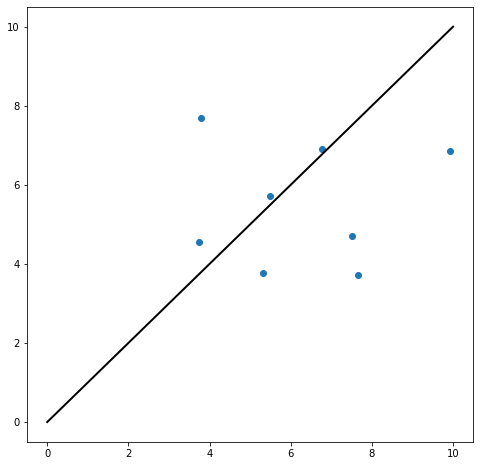

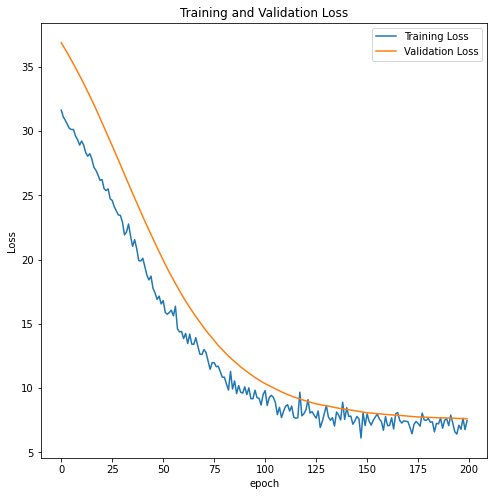

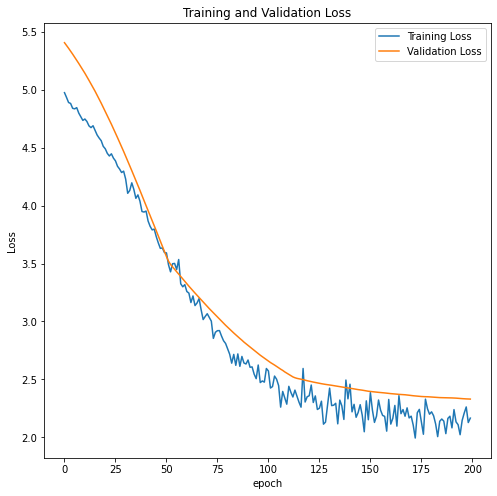

------------------------------------------------------------------------
Training for fold 2 ..., seed 8
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 69ms/sample - loss: 34.0071 - mean_absolute_error: 5.3440 - val_loss: 32.9165 - val_mean_absolute_error: 4.7203
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.0942 - mean_absolute_error: 5.3488 - val_loss: 32.6827 - val_mean_absolute_error: 4.7020
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.1431 - mean_absolute_error: 5.2587 - val_loss: 32.4364 - val_mean_absolute_error: 4.6827
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.2720 - mean_absolute_error: 5.2721 - val_loss: 32.1872 - val_mean_absolute_error: 4.6631
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.7467 - mean_absolute_error: 5.2298 - val_loss: 31.9243 - val_mean_absolute_error: 4.6423
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.4427 - mean_absolute_error: 3.7046 - val_loss: 17.8930 - val_mean_absolute_error: 3.3795
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.3776 - mean_absolute_error: 3.5435 - val_loss: 17.6214 - val_mean_absolute_error: 3.3563
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.6633 - mean_absolute_error: 3.5682 - val_loss: 17.3498 - val_mean_absolute_error: 3.3325
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.8847 - mean_absolute_error: 3.5469 - val_loss: 17.0838 - val_mean_absolute_error: 3.3088
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.9802 - mean_absolute_error: 3.5002 - val_loss: 16.8265 - val_mean_absolute_error: 3.2857
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.5659 - mean_absolute_error: 3.4409 - val_loss: 16.5778 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2379 - mean_absolute_error: 2.3369 - val_loss: 10.7806 - val_mean_absolute_error: 2.8885
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2769 - mean_absolute_error: 2.1642 - val_loss: 10.7399 - val_mean_absolute_error: 2.8837
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5936 - mean_absolute_error: 2.2105 - val_loss: 10.6978 - val_mean_absolute_error: 2.8783
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.4593 - mean_absolute_error: 2.1370 - val_loss: 10.6660 - val_mean_absolute_error: 2.8742
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8106 - mean_absolute_error: 2.2662 - val_loss: 10.6309 - val_mean_absolute_error: 2.8693
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.6564 - mean_absolute_error: 2.2620 - val_loss: 10.5962 - val_mean_absolute_error: 2

Epoch 147/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.8136 - mean_absolute_error: 1.8990 - val_loss: 10.1912 - val_mean_absolute_error: 2.7676
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7890 - mean_absolute_error: 1.8033 - val_loss: 10.1953 - val_mean_absolute_error: 2.7682
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.4279 - mean_absolute_error: 1.6390 - val_loss: 10.1992 - val_mean_absolute_error: 2.7692
Epoch 150/200
15/15 [==============================] - 0s 4ms/sample - loss: 5.7181 - mean_absolute_error: 1.8089 - val_loss: 10.2020 - val_mean_absolute_error: 2.7696
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4380 - mean_absolute_error: 1.9205 - val_loss: 10.2012 - val_mean_absolute_error: 2.7695
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4274 - mean_absolute_error: 1.9881 - val_loss: 10.2048 - val_mean_absolute_error:

Epoch 196/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.4426 - mean_absolute_error: 1.7275 - val_loss: 10.2999 - val_mean_absolute_error: 2.7714
Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.5610 - mean_absolute_error: 1.7298 - val_loss: 10.2990 - val_mean_absolute_error: 2.7710
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.9811 - mean_absolute_error: 1.7707 - val_loss: 10.2998 - val_mean_absolute_error: 2.7709
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.3246 - mean_absolute_error: 1.6079 - val_loss: 10.3063 - val_mean_absolute_error: 2.7712
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.3769 - mean_absolute_error: 1.7132 - val_loss: 10.3083 - val_mean_absolute_error: 2.7711
Spearman correlation: 0.750


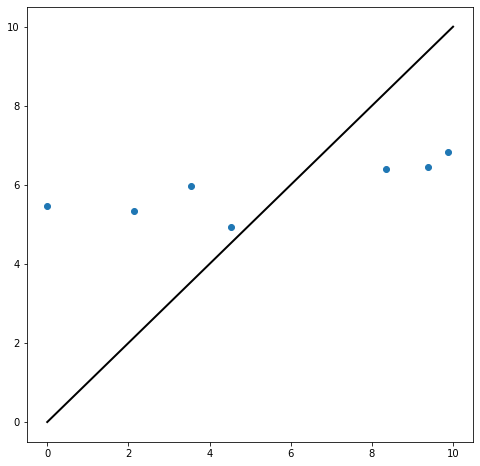

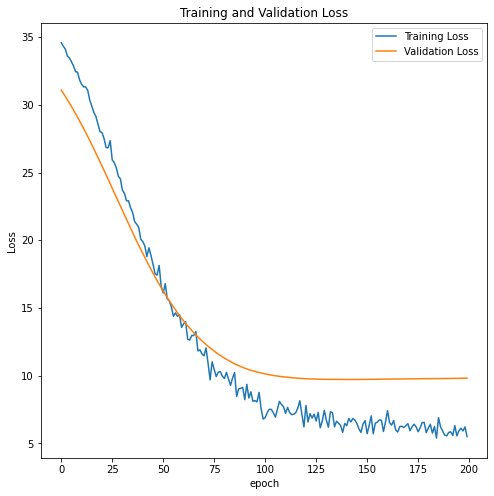

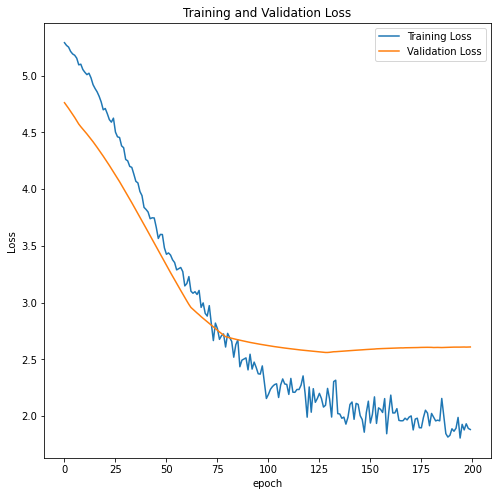

------------------------------------------------------------------------
Training for fold 3 ..., seed 8
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 71ms/sample - loss: 33.9909 - mean_absolute_error: 5.1158 - val_loss: 33.0830 - val_mean_absolute_error: 5.1828
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.4665 - mean_absolute_error: 5.0809 - val_loss: 32.8316 - val_mean_absolute_error: 5.1589
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.4724 - mean_absolute_error: 5.0785 - val_loss: 32.5847 - val_mean_absolute_error: 5.1353
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.6078 - mean_absolute_error: 5.0107 - val_loss: 32.3192 - val_mean_absolute_error: 5.1098
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.6150 - mean_absolute_error: 4.9975 - val_loss: 32.0492 - val_mean_absolute_error: 5.0837
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.3384 - mean_absolute_error: 3.5314 - val_loss: 17.4071 - val_mean_absolute_error: 3.8138
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.3995 - mean_absolute_error: 3.4238 - val_loss: 17.1125 - val_mean_absolute_error: 3.7826
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.7093 - mean_absolute_error: 3.3499 - val_loss: 16.8170 - val_mean_absolute_error: 3.7508
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.9833 - mean_absolute_error: 3.3800 - val_loss: 16.5343 - val_mean_absolute_error: 3.7200
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.3902 - mean_absolute_error: 3.3320 - val_loss: 16.2529 - val_mean_absolute_error: 3.6888
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.3408 - mean_absolute_error: 3.2923 - val_loss: 15.9796 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.7129 - mean_absolute_error: 2.4334 - val_loss: 8.9661 - val_mean_absolute_error: 2.5647
Epoch 99/200
15/15 [==============================] - 0s 6ms/sample - loss: 9.3582 - mean_absolute_error: 2.5320 - val_loss: 8.8928 - val_mean_absolute_error: 2.5460
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.0145 - mean_absolute_error: 2.5419 - val_loss: 8.8304 - val_mean_absolute_error: 2.5299
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.5410 - mean_absolute_error: 2.4155 - val_loss: 8.7625 - val_mean_absolute_error: 2.5119
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2242 - mean_absolute_error: 2.3568 - val_loss: 8.7041 - val_mean_absolute_error: 2.4961
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.2976 - mean_absolute_error: 2.5812 - val_loss: 8.6449 - val_mean_absolute_error: 2.4799


15/15 [==============================] - 0s 5ms/sample - loss: 6.7868 - mean_absolute_error: 2.1747 - val_loss: 7.5276 - val_mean_absolute_error: 2.1520
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.4074 - mean_absolute_error: 2.2751 - val_loss: 7.5192 - val_mean_absolute_error: 2.1494
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8144 - mean_absolute_error: 2.3235 - val_loss: 7.5141 - val_mean_absolute_error: 2.1475
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.7172 - mean_absolute_error: 2.3323 - val_loss: 7.5033 - val_mean_absolute_error: 2.1439
Epoch 151/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.2503 - mean_absolute_error: 2.2391 - val_loss: 7.4927 - val_mean_absolute_error: 2.1398
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.9853 - mean_absolute_error: 2.3567 - val_loss: 7.4868 - val_mean_absolute_error: 2.1380
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.7618 - mean_absolute_error: 2.3744 - val_loss: 7.3888 - val_mean_absolute_error: 2.0842
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2860 - mean_absolute_error: 2.0749 - val_loss: 7.3881 - val_mean_absolute_error: 2.0831
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.0773 - mean_absolute_error: 2.2014 - val_loss: 7.3891 - val_mean_absolute_error: 2.0841
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.8657 - mean_absolute_error: 2.1816 - val_loss: 7.3897 - val_mean_absolute_error: 2.0842
Spearman correlation: -0.179


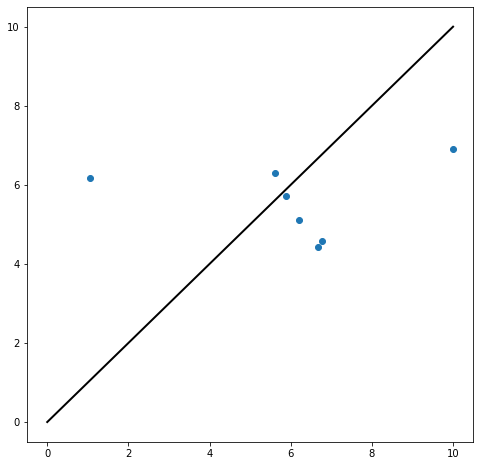

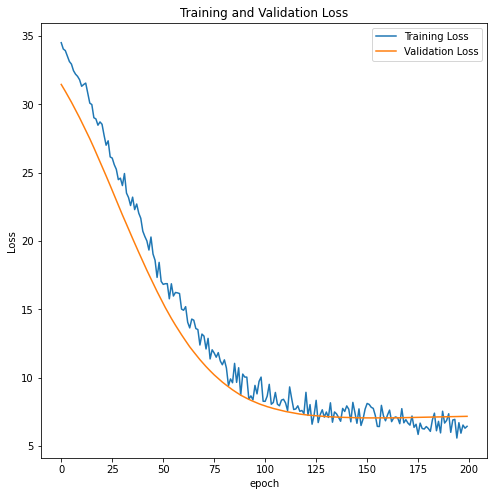

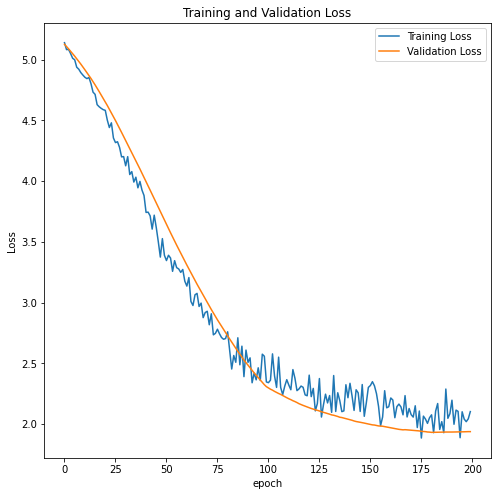

Overall spearman correlation: 0.278
------------------------------------------------------------------------
Training for fold 1 ..., seed 9
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 80ms/sample - loss: 36.2622 - mean_absolute_error: 5.4686 - val_loss: 28.5782 - val_mean_absolute_error: 4.5175
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 36.0411 - mean_absolute_error: 5.4488 - val_loss: 28.3490 - val_mean_absolute_error: 4.4922
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 35.5323 - mean_absolute_error: 5.4094 - val_loss: 28.1147 - val_mean_absolute_error: 4.4661
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 35.4426 - mean_absolute_error: 5.4024 - val_loss: 27.8748 - val_mean_absolute_error: 4.4392
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 35.0178 - mean_absolute_error: 5.3601 - val_loss: 27.6367 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.6680 - mean_absolute_error: 3.6407 - val_loss: 14.4762 - val_mean_absolute_error: 3.1728
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.2983 - mean_absolute_error: 3.5938 - val_loss: 14.2304 - val_mean_absolute_error: 3.1485
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.7085 - mean_absolute_error: 3.4869 - val_loss: 13.9903 - val_mean_absolute_error: 3.1243
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.9813 - mean_absolute_error: 3.5234 - val_loss: 13.7621 - val_mean_absolute_error: 3.1005
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.3384 - mean_absolute_error: 3.4136 - val_loss: 13.5416 - val_mean_absolute_error: 3.0771
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.0854 - mean_absolute_error: 3.5415 - val_loss: 13.3298 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.9697 - mean_absolute_error: 2.0323 - val_loss: 8.9343 - val_mean_absolute_error: 2.6780
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.2161 - mean_absolute_error: 2.1638 - val_loss: 8.9160 - val_mean_absolute_error: 2.6732
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.6144 - mean_absolute_error: 2.0813 - val_loss: 8.8950 - val_mean_absolute_error: 2.6672
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.4961 - mean_absolute_error: 2.2347 - val_loss: 8.8768 - val_mean_absolute_error: 2.6616
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.2248 - mean_absolute_error: 2.2640 - val_loss: 8.8608 - val_mean_absolute_error: 2.6562
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.6499 - mean_absolute_error: 2.1130 - val_loss: 8.8450 - val_mean_absolute_error: 2.6506


14/14 [==============================] - 0s 5ms/sample - loss: 6.5475 - mean_absolute_error: 1.9576 - val_loss: 8.8861 - val_mean_absolute_error: 2.5042
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.8634 - mean_absolute_error: 2.0698 - val_loss: 8.8911 - val_mean_absolute_error: 2.5019
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.4143 - mean_absolute_error: 1.9146 - val_loss: 8.8971 - val_mean_absolute_error: 2.5002
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.7628 - mean_absolute_error: 2.0167 - val_loss: 8.8983 - val_mean_absolute_error: 2.4993
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.9908 - mean_absolute_error: 2.0452 - val_loss: 8.9010 - val_mean_absolute_error: 2.4980
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.8482 - mean_absolute_error: 1.8455 - val_loss: 8.9103 - val_mean_absolute_error: 2.4954
Epoch 153/20

Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.6166 - mean_absolute_error: 1.9683 - val_loss: 9.0408 - val_mean_absolute_error: 2.4464
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.7510 - mean_absolute_error: 1.8213 - val_loss: 9.0476 - val_mean_absolute_error: 2.4455
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.5383 - mean_absolute_error: 1.7353 - val_loss: 9.0476 - val_mean_absolute_error: 2.4451
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.8914 - mean_absolute_error: 1.8502 - val_loss: 9.0495 - val_mean_absolute_error: 2.4446
Spearman correlation: 0.190


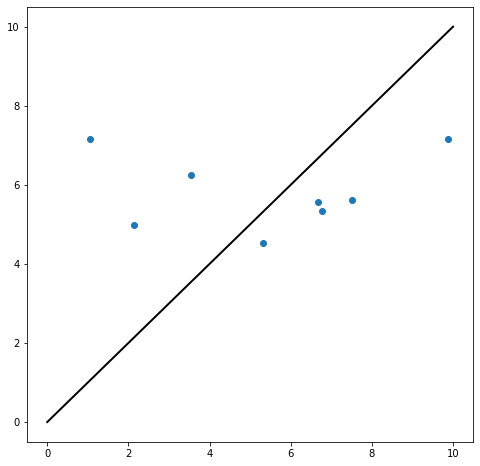

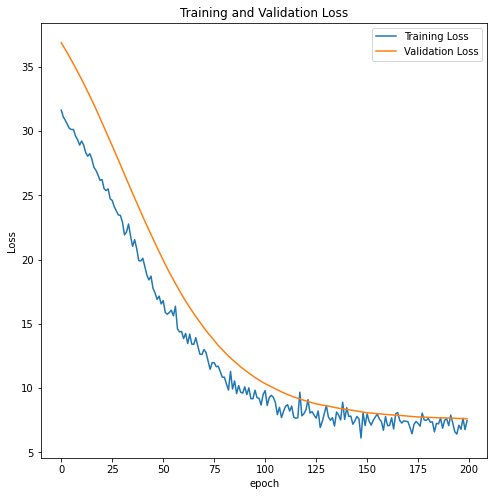

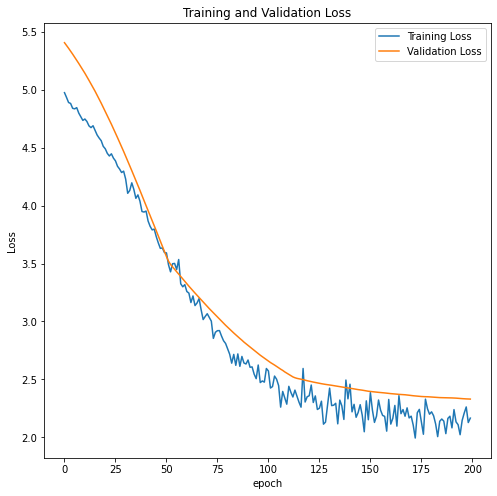

------------------------------------------------------------------------
Training for fold 2 ..., seed 9
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 72ms/sample - loss: 29.5442 - mean_absolute_error: 4.6708 - val_loss: 41.7202 - val_mean_absolute_error: 6.1043
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 29.6386 - mean_absolute_error: 4.6731 - val_loss: 41.4619 - val_mean_absolute_error: 6.0837
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 29.2481 - mean_absolute_error: 4.6299 - val_loss: 41.1878 - val_mean_absolute_error: 6.0619
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 29.1370 - mean_absolute_error: 4.6155 - val_loss: 40.9083 - val_mean_absolute_error: 6.0394
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 28.7273 - mean_absolute_error: 4.5981 - val_loss: 40.6138 - val_mean_absolute_error: 6.0157
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.1732 - mean_absolute_error: 3.5482 - val_loss: 24.4608 - val_mean_absolute_error: 4.5140
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.3038 - mean_absolute_error: 3.4374 - val_loss: 24.0965 - val_mean_absolute_error: 4.4739
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.4320 - mean_absolute_error: 3.4712 - val_loss: 23.7320 - val_mean_absolute_error: 4.4337
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.1193 - mean_absolute_error: 3.4526 - val_loss: 23.3798 - val_mean_absolute_error: 4.3942
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.6175 - mean_absolute_error: 3.3824 - val_loss: 23.0202 - val_mean_absolute_error: 4.3537
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.8176 - mean_absolute_error: 3.4007 - val_loss: 22.6756 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 4ms/sample - loss: 10.4158 - mean_absolute_error: 2.7888 - val_loss: 11.9021 - val_mean_absolute_error: 2.8154
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 10.0644 - mean_absolute_error: 2.7136 - val_loss: 11.7601 - val_mean_absolute_error: 2.7901
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.7744 - mean_absolute_error: 2.6660 - val_loss: 11.6215 - val_mean_absolute_error: 2.7654
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 10.1383 - mean_absolute_error: 2.7091 - val_loss: 11.4786 - val_mean_absolute_error: 2.7395
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 10.0561 - mean_absolute_error: 2.7453 - val_loss: 11.3537 - val_mean_absolute_error: 2.7169
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.2564 - mean_absolute_error: 2.5525 - val_loss: 11.2070 - val_mean_absolute_erro

Epoch 147/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.4839 - mean_absolute_error: 2.5103 - val_loss: 7.7873 - val_mean_absolute_error: 1.9902
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.9635 - mean_absolute_error: 2.3836 - val_loss: 7.7330 - val_mean_absolute_error: 1.9807
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.7654 - mean_absolute_error: 2.5336 - val_loss: 7.6951 - val_mean_absolute_error: 1.9741
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5241 - mean_absolute_error: 2.4082 - val_loss: 7.6564 - val_mean_absolute_error: 1.9674
Epoch 151/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.8932 - mean_absolute_error: 2.3943 - val_loss: 7.6197 - val_mean_absolute_error: 1.9609
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2688 - mean_absolute_error: 2.4929 - val_loss: 7.5818 - val_mean_absolute_error: 1.954

15/15 [==============================] - 0s 5ms/sample - loss: 8.0554 - mean_absolute_error: 2.4203 - val_loss: 6.5913 - val_mean_absolute_error: 1.8195
Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2752 - mean_absolute_error: 2.4177 - val_loss: 6.5932 - val_mean_absolute_error: 1.8197
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.3838 - mean_absolute_error: 2.2482 - val_loss: 6.5862 - val_mean_absolute_error: 1.8188
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8345 - mean_absolute_error: 2.2914 - val_loss: 6.5863 - val_mean_absolute_error: 1.8186
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.9318 - mean_absolute_error: 2.4042 - val_loss: 6.5746 - val_mean_absolute_error: 1.8171
Spearman correlation: 0.643


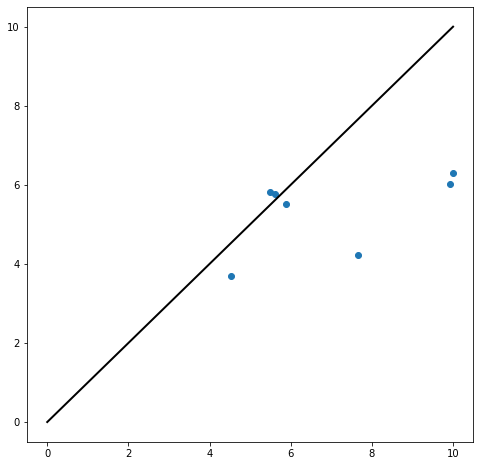

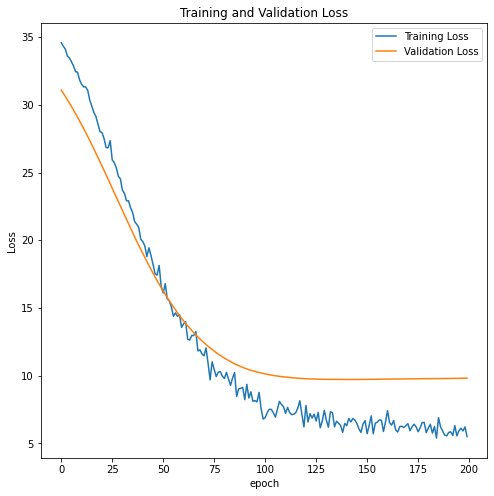

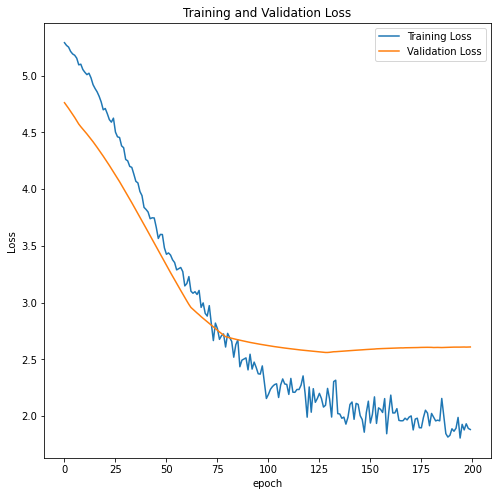

------------------------------------------------------------------------
Training for fold 3 ..., seed 9
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 74ms/sample - loss: 34.9978 - mean_absolute_error: 5.2891 - val_loss: 30.4522 - val_mean_absolute_error: 4.7951
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.1781 - mean_absolute_error: 5.2325 - val_loss: 30.2101 - val_mean_absolute_error: 4.7747
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.1755 - mean_absolute_error: 5.2004 - val_loss: 29.9637 - val_mean_absolute_error: 4.7538
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.0660 - mean_absolute_error: 5.1927 - val_loss: 29.7210 - val_mean_absolute_error: 4.7332
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.3055 - mean_absolute_error: 5.2149 - val_loss: 29.4807 - val_mean_absolute_error: 4.7126
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.7543 - mean_absolute_error: 3.6353 - val_loss: 15.9103 - val_mean_absolute_error: 3.2682
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.5591 - mean_absolute_error: 3.5642 - val_loss: 15.6466 - val_mean_absolute_error: 3.2476
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.5779 - mean_absolute_error: 3.6260 - val_loss: 15.4001 - val_mean_absolute_error: 3.2281
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.2248 - mean_absolute_error: 3.4383 - val_loss: 15.1523 - val_mean_absolute_error: 3.2081
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.8156 - mean_absolute_error: 3.3744 - val_loss: 14.9040 - val_mean_absolute_error: 3.1876
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.8921 - mean_absolute_error: 3.4160 - val_loss: 14.6684 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2140 - mean_absolute_error: 2.3428 - val_loss: 9.4265 - val_mean_absolute_error: 2.5987
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.1055 - mean_absolute_error: 2.2974 - val_loss: 9.3900 - val_mean_absolute_error: 2.5941
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.5036 - mean_absolute_error: 2.5199 - val_loss: 9.3615 - val_mean_absolute_error: 2.5903
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.1535 - mean_absolute_error: 2.1042 - val_loss: 9.3295 - val_mean_absolute_error: 2.5858
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2786 - mean_absolute_error: 2.1617 - val_loss: 9.2994 - val_mean_absolute_error: 2.5814
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9468 - mean_absolute_error: 2.0712 - val_loss: 9.2753 - val_mean_absolute_error: 2.5777


15/15 [==============================] - 0s 5ms/sample - loss: 4.9244 - mean_absolute_error: 1.7259 - val_loss: 9.0949 - val_mean_absolute_error: 2.4635
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.5788 - mean_absolute_error: 1.9927 - val_loss: 9.0996 - val_mean_absolute_error: 2.4623
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2175 - mean_absolute_error: 1.9136 - val_loss: 9.1050 - val_mean_absolute_error: 2.4607
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2090 - mean_absolute_error: 2.0115 - val_loss: 9.1098 - val_mean_absolute_error: 2.4595
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.6946 - mean_absolute_error: 1.9382 - val_loss: 9.1154 - val_mean_absolute_error: 2.4578
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4296 - mean_absolute_error: 1.9956 - val_loss: 9.1188 - val_mean_absolute_error: 2.4569
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.0120 - mean_absolute_error: 1.7629 - val_loss: 9.3321 - val_mean_absolute_error: 2.4670
Epoch 198/200
15/15 [==============================] - 0s 4ms/sample - loss: 4.7609 - mean_absolute_error: 1.7508 - val_loss: 9.3344 - val_mean_absolute_error: 2.4676
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 4.6581 - mean_absolute_error: 1.6715 - val_loss: 9.3346 - val_mean_absolute_error: 2.4679
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.6882 - mean_absolute_error: 1.8276 - val_loss: 9.3394 - val_mean_absolute_error: 2.4691
Spearman correlation: 0.500


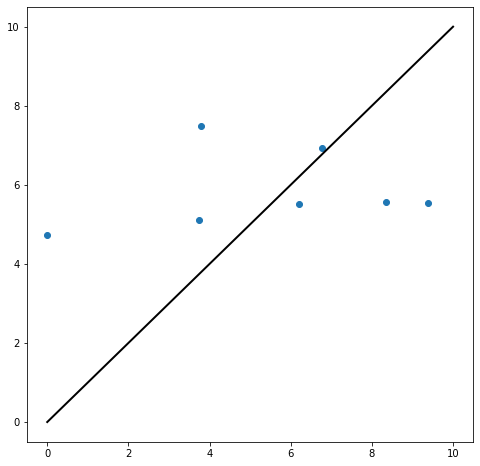

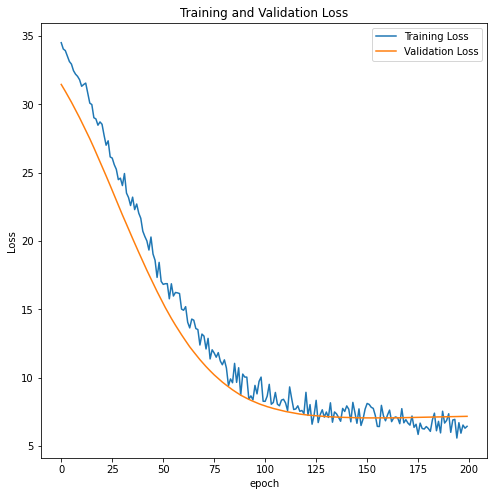

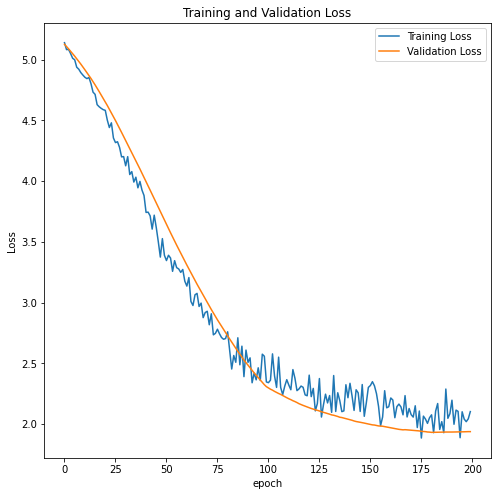

Overall spearman correlation: 0.228
------------------------------------------------------------------------
Training for fold 1 ..., seed 10
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 82ms/sample - loss: 34.1322 - mean_absolute_error: 5.1235 - val_loss: 31.9079 - val_mean_absolute_error: 5.0842
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.1699 - mean_absolute_error: 5.1314 - val_loss: 31.6640 - val_mean_absolute_error: 5.0649
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 33.3870 - mean_absolute_error: 5.0575 - val_loss: 31.4019 - val_mean_absolute_error: 5.0442
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 33.2845 - mean_absolute_error: 5.0712 - val_loss: 31.1381 - val_mean_absolute_error: 5.0232
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 33.4416 - mean_absolute_error: 5.0582 - val_loss: 30.8791 - val_mean_ab

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.9044 - mean_absolute_error: 3.5389 - val_loss: 16.5546 - val_mean_absolute_error: 3.6043
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.3706 - mean_absolute_error: 3.5558 - val_loss: 16.2717 - val_mean_absolute_error: 3.5687
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.0952 - mean_absolute_error: 3.5207 - val_loss: 15.9895 - val_mean_absolute_error: 3.5325
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.3048 - mean_absolute_error: 3.5189 - val_loss: 15.7025 - val_mean_absolute_error: 3.4952
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.1642 - mean_absolute_error: 3.4117 - val_loss: 15.4229 - val_mean_absolute_error: 3.4582
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.7149 - mean_absolute_error: 3.3684 - val_loss: 15.1548 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 10.1771 - mean_absolute_error: 2.7523 - val_loss: 8.4739 - val_mean_absolute_error: 2.2602
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.3579 - mean_absolute_error: 2.6063 - val_loss: 8.4129 - val_mean_absolute_error: 2.2463
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 10.3838 - mean_absolute_error: 2.7634 - val_loss: 8.3597 - val_mean_absolute_error: 2.2337
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.5823 - mean_absolute_error: 2.4851 - val_loss: 8.2994 - val_mean_absolute_error: 2.2190
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.1825 - mean_absolute_error: 2.3814 - val_loss: 8.2457 - val_mean_absolute_error: 2.2058
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.1527 - mean_absolute_error: 2.5713 - val_loss: 8.1997 - val_mean_absolute_error: 2.194

14/14 [==============================] - 0s 5ms/sample - loss: 7.2020 - mean_absolute_error: 2.2448 - val_loss: 7.2562 - val_mean_absolute_error: 2.0271
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.3477 - mean_absolute_error: 2.2603 - val_loss: 7.2522 - val_mean_absolute_error: 2.0267
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.6785 - mean_absolute_error: 2.0847 - val_loss: 7.2432 - val_mean_absolute_error: 2.0263
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.2429 - mean_absolute_error: 2.2767 - val_loss: 7.2389 - val_mean_absolute_error: 2.0259
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.2417 - mean_absolute_error: 2.2237 - val_loss: 7.2327 - val_mean_absolute_error: 2.0254
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.3443 - mean_absolute_error: 2.2676 - val_loss: 7.2265 - val_mean_absolute_error: 2.0249
Epoch 153/20

Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.7578 - mean_absolute_error: 1.9404 - val_loss: 7.1625 - val_mean_absolute_error: 2.0032
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.8327 - mean_absolute_error: 2.0627 - val_loss: 7.1633 - val_mean_absolute_error: 2.0027
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.5457 - mean_absolute_error: 1.9997 - val_loss: 7.1630 - val_mean_absolute_error: 2.0023
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.8215 - mean_absolute_error: 1.8421 - val_loss: 7.1644 - val_mean_absolute_error: 2.0020
Spearman correlation: 0.262


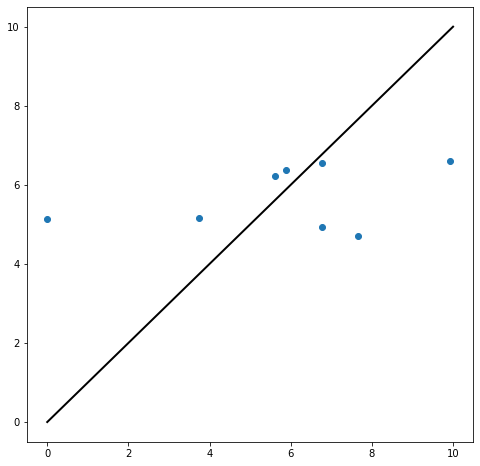

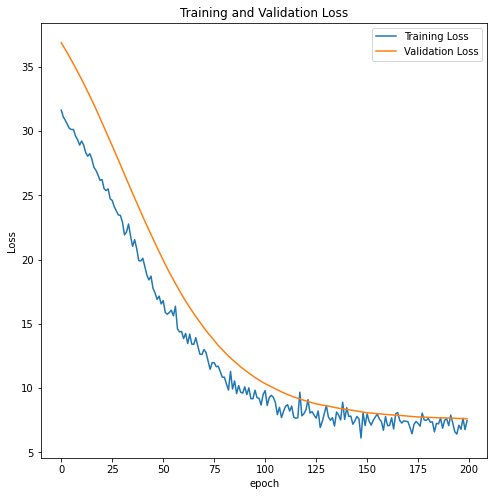

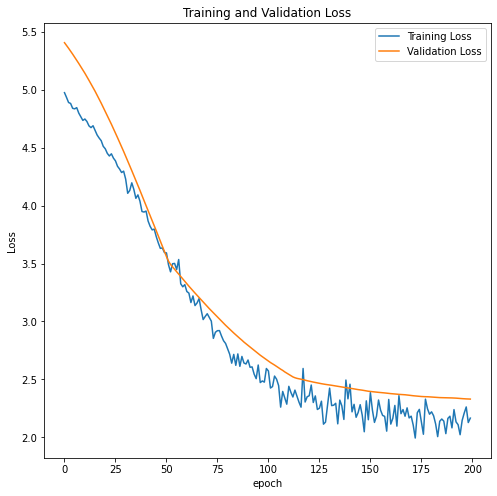

------------------------------------------------------------------------
Training for fold 2 ..., seed 10
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 76ms/sample - loss: 34.3850 - mean_absolute_error: 5.2638 - val_loss: 30.6299 - val_mean_absolute_error: 4.7699
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.6227 - mean_absolute_error: 5.2720 - val_loss: 30.3897 - val_mean_absolute_error: 4.7453
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.3051 - mean_absolute_error: 5.2541 - val_loss: 30.1461 - val_mean_absolute_error: 4.7201
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.8058 - mean_absolute_error: 5.2065 - val_loss: 29.8967 - val_mean_absolute_error: 4.6943
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.6569 - mean_absolute_error: 5.1875 - val_loss: 29.6396 - val_mean_absolute_error: 4.6674
Epoch 6/200
15/

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.1314 - mean_absolute_error: 3.5556 - val_loss: 16.0077 - val_mean_absolute_error: 3.4563
Epoch 50/200
15/15 [==============================] - 0s 4ms/sample - loss: 17.1987 - mean_absolute_error: 3.4376 - val_loss: 15.7395 - val_mean_absolute_error: 3.4241
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.7848 - mean_absolute_error: 3.4573 - val_loss: 15.4768 - val_mean_absolute_error: 3.3920
Epoch 52/200
15/15 [==============================] - 0s 4ms/sample - loss: 16.0292 - mean_absolute_error: 3.3237 - val_loss: 15.2175 - val_mean_absolute_error: 3.3597
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.4356 - mean_absolute_error: 3.3979 - val_loss: 14.9610 - val_mean_absolute_error: 3.3270
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.2237 - mean_absolute_error: 3.3816 - val_loss: 14.7132 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.4183 - mean_absolute_error: 2.3211 - val_loss: 9.1865 - val_mean_absolute_error: 2.6041
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.7099 - mean_absolute_error: 2.3817 - val_loss: 9.1495 - val_mean_absolute_error: 2.5942
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.7340 - mean_absolute_error: 2.3638 - val_loss: 9.1144 - val_mean_absolute_error: 2.5844
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.7795 - mean_absolute_error: 2.1669 - val_loss: 9.0815 - val_mean_absolute_error: 2.5748
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.0898 - mean_absolute_error: 2.2907 - val_loss: 9.0574 - val_mean_absolute_error: 2.5673
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.3869 - mean_absolute_error: 2.3310 - val_loss: 9.0282 - val_mean_absolute_error: 2.5581


15/15 [==============================] - 0s 5ms/sample - loss: 6.4828 - mean_absolute_error: 2.0538 - val_loss: 8.7876 - val_mean_absolute_error: 2.3126
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2036 - mean_absolute_error: 2.1988 - val_loss: 8.7902 - val_mean_absolute_error: 2.3119
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.6057 - mean_absolute_error: 2.0992 - val_loss: 8.7956 - val_mean_absolute_error: 2.3111
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7609 - mean_absolute_error: 2.0940 - val_loss: 8.8010 - val_mean_absolute_error: 2.3102
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7384 - mean_absolute_error: 2.0497 - val_loss: 8.8052 - val_mean_absolute_error: 2.3098
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.8804 - mean_absolute_error: 2.1426 - val_loss: 8.8081 - val_mean_absolute_error: 2.3090
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2672 - mean_absolute_error: 1.9792 - val_loss: 8.9944 - val_mean_absolute_error: 2.2867
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7475 - mean_absolute_error: 2.0566 - val_loss: 8.9980 - val_mean_absolute_error: 2.2867
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2610 - mean_absolute_error: 2.0311 - val_loss: 9.0000 - val_mean_absolute_error: 2.2867
Epoch 200/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.1435 - mean_absolute_error: 2.2247 - val_loss: 9.0002 - val_mean_absolute_error: 2.2869
Spearman correlation: 0.071


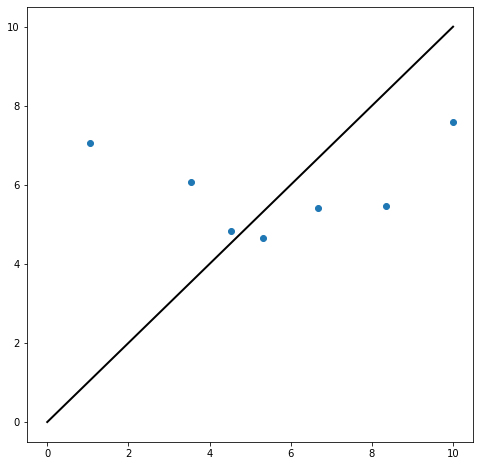

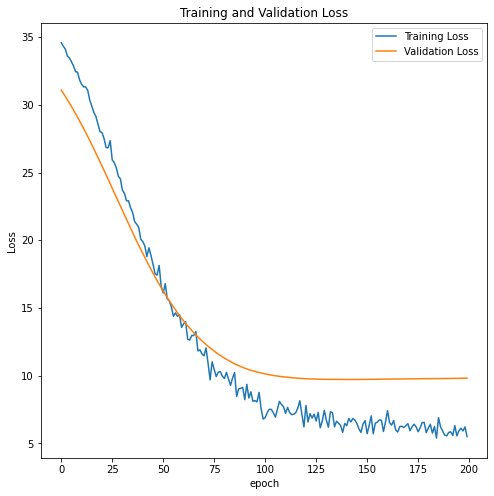

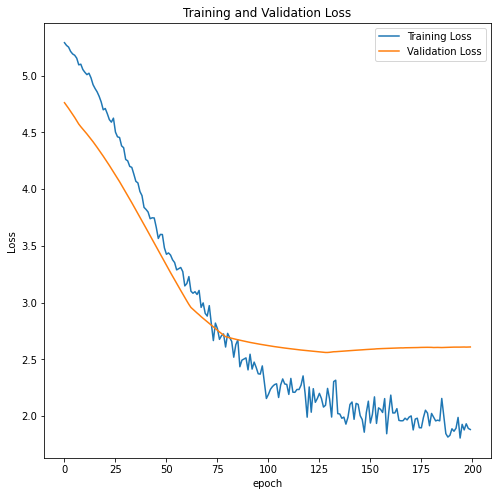

------------------------------------------------------------------------
Training for fold 3 ..., seed 10
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 77ms/sample - loss: 31.4456 - mean_absolute_error: 4.9559 - val_loss: 37.8690 - val_mean_absolute_error: 5.4929
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 31.2020 - mean_absolute_error: 4.9165 - val_loss: 37.6210 - val_mean_absolute_error: 5.4698
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 30.9257 - mean_absolute_error: 4.9157 - val_loss: 37.3652 - val_mean_absolute_error: 5.4460
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 30.5900 - mean_absolute_error: 4.8686 - val_loss: 37.1113 - val_mean_absolute_error: 5.4222
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 30.8602 - mean_absolute_error: 4.8903 - val_loss: 36.8521 - val_mean_absolute_error: 5.3978
Epoch 6/200
15/

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.6820 - mean_absolute_error: 3.5623 - val_loss: 22.1144 - val_mean_absolute_error: 3.7589
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.5822 - mean_absolute_error: 3.5568 - val_loss: 21.8018 - val_mean_absolute_error: 3.7163
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.7346 - mean_absolute_error: 3.5766 - val_loss: 21.4975 - val_mean_absolute_error: 3.6742
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.5028 - mean_absolute_error: 3.4177 - val_loss: 21.1888 - val_mean_absolute_error: 3.6333
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.5997 - mean_absolute_error: 3.4798 - val_loss: 20.8886 - val_mean_absolute_error: 3.6066
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 14.9763 - mean_absolute_error: 3.3578 - val_loss: 20.5864 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.7744 - mean_absolute_error: 2.3994 - val_loss: 12.3437 - val_mean_absolute_error: 2.9593
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2002 - mean_absolute_error: 2.3672 - val_loss: 12.2486 - val_mean_absolute_error: 2.9491
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.5350 - mean_absolute_error: 2.4214 - val_loss: 12.1540 - val_mean_absolute_error: 2.9388
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.5859 - mean_absolute_error: 2.4524 - val_loss: 12.0649 - val_mean_absolute_error: 2.9289
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.7554 - mean_absolute_error: 2.4743 - val_loss: 11.9740 - val_mean_absolute_error: 2.9187
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.1911 - mean_absolute_error: 2.4844 - val_loss: 11.8874 - val_mean_absolute_error: 2

Epoch 147/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5701 - mean_absolute_error: 2.2174 - val_loss: 9.9384 - val_mean_absolute_error: 2.6842
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9025 - mean_absolute_error: 2.1280 - val_loss: 9.9253 - val_mean_absolute_error: 2.6835
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.0198 - mean_absolute_error: 2.2096 - val_loss: 9.9022 - val_mean_absolute_error: 2.6820
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.6350 - mean_absolute_error: 2.0058 - val_loss: 9.8877 - val_mean_absolute_error: 2.6811
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9923 - mean_absolute_error: 2.1028 - val_loss: 9.8681 - val_mean_absolute_error: 2.6798
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9178 - mean_absolute_error: 2.0402 - val_loss: 9.8475 - val_mean_absolute_error: 2.678

15/15 [==============================] - 0s 5ms/sample - loss: 6.9228 - mean_absolute_error: 2.0513 - val_loss: 9.3700 - val_mean_absolute_error: 2.6410
Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.0469 - mean_absolute_error: 2.0563 - val_loss: 9.3639 - val_mean_absolute_error: 2.6404
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.6552 - mean_absolute_error: 2.0494 - val_loss: 9.3614 - val_mean_absolute_error: 2.6399
Epoch 199/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.2560 - mean_absolute_error: 1.9819 - val_loss: 9.3527 - val_mean_absolute_error: 2.6392
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.8380 - mean_absolute_error: 2.1165 - val_loss: 9.3441 - val_mean_absolute_error: 2.6383
Spearman correlation: 0.071


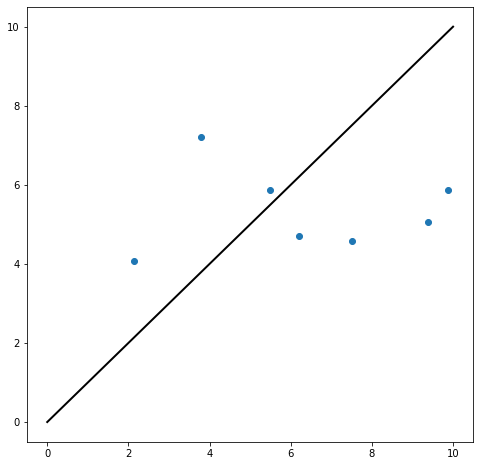

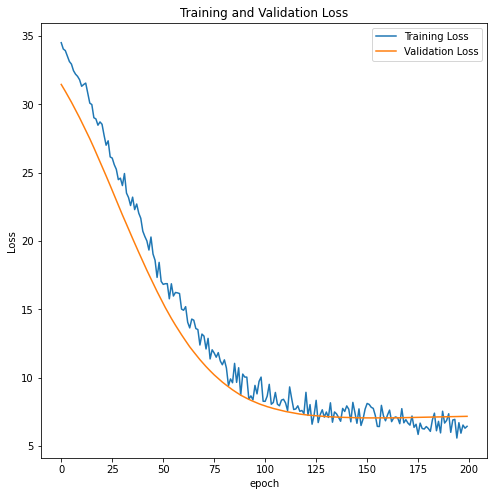

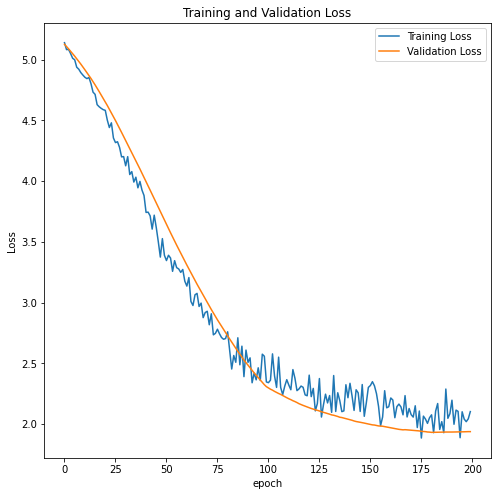

Overall spearman correlation: 0.112


In [20]:
##### 3 fold CV to evaluate ####

# initiate lists of results
overall_cor_res = []
corr_list= []

# K-fold Cross Validation model evaluation


for k in range(0,10):
    
    # list of train/test
    exp_train = [0]*3
    exp_test = [0]*3
    auc_train = [0]*3
    auc_test = [0]*3
    pred_res = []
    # loss
    loss = []
    val_loss = []
    mse = []
    val_mse = []
    
      
    for fold_no in range(0,3):
    
        # split dataset
        exp_train[fold_no], exp_test[fold_no] = impress.iloc[train_index[k][fold_no],:], impress.iloc[test_index[k][fold_no],:]
        auc_train[fold_no], auc_test[fold_no] = auc_norm[train_index[k][fold_no]], auc_norm[test_index[k][fold_no]]
    
        # normalize
        exp_train[fold_no] = Standard.fit_transform(exp_train[fold_no])
        exp_test[fold_no] = Standard.fit_transform(exp_test[fold_no])
    
    
        # Generate a print
        print('------------------------------------------------------------------------')
        print(f'Training for fold {(fold_no+1)} ..., seed {(k+1)}')
    
        # Create a basic model instance
        pred_model = create_model2(l2 = 0.0001,l1=0.0001,opt = tf.keras.optimizers.Adam(lr = 0.0001))#
    
    
        # fit data
        refine_model = pred_model.fit(x=exp_train[fold_no], y=auc_train[fold_no], epochs=200, batch_size=32,
                                  validation_data=(exp_test[fold_no],auc_test[fold_no])
                                 )
    
        # predict and evaluate
        pred = pred_model.predict(exp_test[fold_no])
        pred = pd.DataFrame(pred)
        pred_res.append(pred)
        test = auc_test[fold_no].reset_index(drop = True)
    
        # calculate Spearman's correlation
        corr, _ = spearmanr(test, pred[0])
        print('Spearman correlation: %.3f' % corr)
        corr_list.append(corr)
        # visualize
        plt.figure(figsize=(8, 8))
        plt.scatter(test,pred[0])
        plt.plot([0, 10], [0, 10], 'k-', lw=2)
    
        # plot loss train and validate
        loss.append(refine_model.history['loss'])
        val_loss.append(refine_model.history['val_loss'])
        plt_loss(loss[fold_no],val_loss[fold_no],fold_no+1)
    
        # plot acc train and validate
        mse.append(refine_model.history['mean_absolute_error'])
        val_mse.append(refine_model.history['val_mean_absolute_error'])
        plt_loss(mse[fold_no],val_mse[fold_no],fold_no+1)


    # test_all
    test_all = np.concatenate([auc_test[0],auc_test[1],auc_test[2]])#,auc_test[3],auc_test[4]
    # pred_all 
    pred_all = np.concatenate([pred_res[0],pred_res[1],pred_res[2]])#,pred_res[3],pred_res[4]
    overall_cor, _ = spearmanr(test_all, pred_all)
    overall_cor_res.append(overall_cor)
    print('Overall spearman correlation: %.3f' % overall_cor)
    
    # break

In [24]:
overall_cor_res

[0.17221908526256355,
 0.2682100508187465,
 0.21174477696216829,
 0.313382269904009,
 0.14172783738001132,
 0.3630717108977979,
 0.15302089215132694,
 0.27724449463579903,
 0.2275550536420102,
 0.11236589497459064]

In [26]:
np.mean(overall_cor_res)

0.22405420666290235

In [27]:
statistics.stdev(overall_cor_res)

0.08112583797969282

In [48]:
##### use mae as the loss function ####
# seed_num = 1000

# normalize
impress_std = Standard.fit_transform(impress)
    
# Create a basic model instance
pred_model = create_model2(l2 = 0.0001,l1=0.0001,opt = tf.keras.optimizers.Adam(lr = 0.0001))
  
refine_model = pred_model.fit(x=impress_std, y=auc_norm, epochs=200, batch_size=32) 


Train on 22 samples
Epoch 1/200
22/22 [==============================] - 2s 91ms/sample - loss: 33.2370 - mean_absolute_error: 5.1138
Epoch 2/200
22/22 [==============================] - 0s 3ms/sample - loss: 33.1933 - mean_absolute_error: 5.1051
Epoch 3/200
22/22 [==============================] - 0s 3ms/sample - loss: 33.2110 - mean_absolute_error: 5.0832
Epoch 4/200
22/22 [==============================] - 0s 3ms/sample - loss: 32.7492 - mean_absolute_error: 5.0718
Epoch 5/200
22/22 [==============================] - 0s 3ms/sample - loss: 32.5044 - mean_absolute_error: 5.0350
Epoch 6/200
22/22 [==============================] - 0s 3ms/sample - loss: 31.8330 - mean_absolute_error: 4.9812
Epoch 7/200
22/22 [==============================] - 0s 3ms/sample - loss: 31.7166 - mean_absolute_error: 4.9803
Epoch 8/200
22/22 [==============================] - 0s 3ms/sample - loss: 32.0446 - mean_absolute_error: 4.9911
Epoch 9/200
22/22 [==============================] - 0s 3ms/sample - loss: 

Epoch 73/200
22/22 [==============================] - 0s 3ms/sample - loss: 12.2009 - mean_absolute_error: 2.9567
Epoch 74/200
22/22 [==============================] - 0s 4ms/sample - loss: 12.0191 - mean_absolute_error: 2.8804
Epoch 75/200
22/22 [==============================] - 0s 3ms/sample - loss: 11.2715 - mean_absolute_error: 2.8228
Epoch 76/200
22/22 [==============================] - 0s 3ms/sample - loss: 11.4819 - mean_absolute_error: 2.8476
Epoch 77/200
22/22 [==============================] - 0s 3ms/sample - loss: 11.8947 - mean_absolute_error: 2.8933
Epoch 78/200
22/22 [==============================] - 0s 3ms/sample - loss: 10.9506 - mean_absolute_error: 2.7694
Epoch 79/200
22/22 [==============================] - 0s 3ms/sample - loss: 10.9647 - mean_absolute_error: 2.7880
Epoch 80/200
22/22 [==============================] - 0s 3ms/sample - loss: 11.1900 - mean_absolute_error: 2.7575
Epoch 81/200
22/22 [==============================] - 0s 3ms/sample - loss: 10.4811 - me

Epoch 145/200
22/22 [==============================] - 0s 3ms/sample - loss: 7.1849 - mean_absolute_error: 2.1659
Epoch 146/200
22/22 [==============================] - 0s 3ms/sample - loss: 7.3277 - mean_absolute_error: 2.2006
Epoch 147/200
22/22 [==============================] - 0s 3ms/sample - loss: 6.9296 - mean_absolute_error: 2.1269
Epoch 148/200
22/22 [==============================] - 0s 3ms/sample - loss: 7.4055 - mean_absolute_error: 2.2014
Epoch 149/200
22/22 [==============================] - 0s 3ms/sample - loss: 7.8344 - mean_absolute_error: 2.2841
Epoch 150/200
22/22 [==============================] - 0s 3ms/sample - loss: 6.9774 - mean_absolute_error: 2.1784
Epoch 151/200
22/22 [==============================] - 0s 3ms/sample - loss: 6.8319 - mean_absolute_error: 2.1015
Epoch 152/200
22/22 [==============================] - 0s 3ms/sample - loss: 7.9281 - mean_absolute_error: 2.2958
Epoch 153/200
22/22 [==============================] - 0s 3ms/sample - loss: 7.3176 - me

In [49]:
# save weights
pred_model.save_weights("impress_model_oxa_tmz_new.h5")